In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import statsmodels.formula.api as smf

In [3]:
cd

/Users/tk18583


In [87]:
data = pd.read_csv('./../../Volumes/Extreme_SSD/WORK/EPC/gas_consumption/mec_combined_withgap3.csv')
#weather = pd.read_csv('./../../Volumes/Extreme_SSD/WORK/EPC/gas_consumption/Weather_region_to_LSOA_lookup(in).csv')
LSOA = gpd.read_file('./../../Volumes/Extreme_SSD/WORK/boundaries/LSOA2021_DZ2011/GB_LSOA21_DZ11.shp')
vars = pd.read_excel('./../../Volumes/Extreme_SSD/WORK/EPC/gas_consumption/variable_mapping2.xls')
labels = dict(vars.loc[:,['name_final','label']].values)

/var/folders/t5/57qdsp617xj8dd1by4td7fl40000gq/T/ipykernel_2146/2814370852.py:1: DtypeWarning: Columns (100,101,143) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./../../Volumes/Extreme_SSD/WORK/EPC/gas_consumption/mec_combined_withgap3.csv')


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42641 entries, 0 to 42640
Columns: 155 entries, LSOA_CODE_GB to D2_GAP_normalised
dtypes: float64(124), int64(17), object(14)
memory usage: 50.4+ MB


In [90]:
LSOA.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42668 entries, 0 to 42667
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   label       35692 non-null  object  
 1   lsoa21cd    35692 non-null  object  
 2   lsoa21nm    35692 non-null  object  
 3   name        35692 non-null  object  
 4   lsoa21cd_2  6996 non-null   object  
 5   Name_2      6996 non-null   object  
 6   TotPop2011  6996 non-null   float64 
 7   ResPop2011  6996 non-null   float64 
 8   HHCnt2011   6996 non-null   float64 
 9   StdAreaHa   6996 non-null   float64 
 10  StdAreaKm2  6996 non-null   float64 
 11  Shape_Leng  6996 non-null   float64 
 12  Shape_Area  6996 non-null   float64 
 13  mapcode     42668 non-null  object  
 14  difference  42661 non-null  float64 
 15  geometry    42668 non-null  geometry
dtypes: float64(8), geometry(1), object(7)
memory usage: 5.2+ MB


In [91]:
data

LSOA_CODE_GB               LSOA_NAME_GB  A_GasMeter_num  \
0        E01000001        City of London 001A              54   
1        E01000002        City of London 001B              16   
2        E01000003        City of London 001C             545   
3        E01000005        City of London 001E             394   
4        E01000006  Barking and Dagenham 016A             403   
...            ...                        ...             ...   
42636    W01002036     Vale of Glamorgan 005G             704   
42637    W01002037     Vale of Glamorgan 005H             541   
42638    W01002038     Vale of Glamorgan 014G             586   
42639    W01002039     Vale of Glamorgan 014H             748   
42640    W01002040     Vale of Glamorgan 015F            1099   

       A_Gas_Consump_tot  A_Gas_Consump_mean  A_Gas_Consump_med  \
0           5.427412e+05        10050.763673        4885.651770   
1           4.177373e+05        26108.583697       14408.743458   
2           3.685674e+06         6762.705232        5468.133361   
3           2.628638e+06         6671.670332        4043.401373   
4           5.857459e+06        14534.638023       13708.799169   
...                  ...                 ...                ...   
42636       5.056894e+06         7183.087986        5933.914535   
42637       4.862706e+06         8988.365173        8319.211369   
42638       5.775592e+06         9855.959031        8335.054669   
42639       6.929357e+06         9263.846230        8589.548839   
42640       5.114587e+06         4653.855629        4154.926167   

       A_GasNonMeter_num  A_ElecMeter_num  A_Elec_Consump_tot  \
0                    0.0             1055         3951091.502   
1                    0.0             1165         3892982.253   
2                   17.0             1271         3102470.068   
3                   35.0              580         1367175.179   
4                    6.0              528         2076019.903   
...                  ...              ...                 ...   
42636                0.0              856         2362219.031   
42637               13.0              636         1695481.337   
42638                5.0              638         1998086.218   
42639                0.0              748         2399307.979   
42640                0.0             1107         2522025.924   

       A_Elec_Consump_mean  ...  E_SOLID_FUEL_HIGH  E_PropAge_modal  \
0              3745.110428  ...                  0        1950-1975   
1              3341.615668  ...                  0     2003_onwards   
2              2440.967795  ...                  0        1950-1975   
3              2357.198584  ...                  0        1950-1975   
4              3931.855877  ...                  0        1930-1949   
...                    ...  ...                ...              ...   
42636          2759.601672  ...                  0        1976-2002   
42637          2665.851159  ...                  0        1976-2002   
42638          3131.796580  ...                  0        1950-1975   
42639          3207.630988  ...                  0     2003_onwards   
42640          2278.252867  ...                  0     2003_onwards   

       D_Pred_Rank_Ener_m2_mean  D2_Pred_Rank_Ener_m2_mean   D_GAP_raw  \
0                            77                       74.0   64.920791   
1                             5                        1.0 -270.591857   
2                            24                       34.0   56.099660   
3                             8                        3.0   21.698304   
4                            64                       40.0   40.505309   
...                         ...                        ...         ...   
42636                         2                        2.0   10.179391   
42637                        19                        7.0   65.256894   
42638                        29                       20.0   83.888980   
42639                         2               

In [6]:
data['WEATHER_REGION'].isna().describe()

count     43412
unique        1
top       False
freq      43412
Name: WEATHER_REGION, dtype: object

In [146]:
pd.DataFrame(data.columns)[0].unique()

array(['LSOA_CODE_GB', 'LSOA_NAME_GB', 'A_GasMeter_num',
       'A_Gas_Consump_tot', 'A_Gas_Consump_mean', 'A_Gas_Consump_med',
       'A_GasNonMeter_num', 'A_ElecMeter_num', 'A_Elec_Consump_tot',
       'A_Elec_Consump_mean', 'A_Elec_Consump_med', 'C_DomProp_num',
       'C_DomGasMeter_num', 'C_OffGrid_num', 'C_OffGrid_prop',
       'E_FloorArea_med', 'E_FloorArea_mean', 'E_EPC_num',
       'D_EPC_vs_Census_prop', 'C_Residents_tot', 'COUNTRY',
       'D_Gas_Elec_Meter_ratio', 'D_Act_Ener_Consump_mean',
       'D_Act_Gas_Consump_m2_mean', 'D_Act_Gas_Consump_m2_med',
       'D_Act_Elec_Consump_m2_mean', 'D_Act_Elec_Consump_m2_med',
       'D_Act_Ener_Consump_m2_mean', 'D_Act_Rank_Gas_m2',
       'D_Act_Rank_Elec_m2', 'D_Act_Rank_Ener_m2_averaged',
       'D_Act_Rank_Ener_m2', 'E_MULTI_GLAZE_PROP_med',
       'E_MULTI_GLAZE_PROP_mean', 'E_EXTENSION_COUNT_mean',
       'E_PHOTO_SUPPLY_prop', 'E_ROOF_INSULATION_prop', 'E_THATCHED_prop',
       'E_OpenFire_mean', 'E_OpenFire_prop', 'E_HEAT_

In [92]:
LSOA = LSOA.merge(data, right_on='LSOA_CODE_GB', left_on='mapcode', how='right')
LSOA.columns

Index(['label', 'lsoa21cd', 'lsoa21nm', 'name', 'lsoa21cd_2', 'Name_2',
       'TotPop2011', 'ResPop2011', 'HHCnt2011', 'StdAreaHa',
       ...
       'E_SOLID_FUEL_HIGH', 'E_PropAge_modal', 'D_Pred_Rank_Ener_m2_mean',
       'D2_Pred_Rank_Ener_m2_mean', 'D_GAP_raw', 'D2_GAP_raw', 'D_GAP_rank',
       'D2_GAP_rank', 'D_GAP_normalised', 'D2_GAP_normalised'],
      dtype='object', length=171)

In [8]:
grouped = LSOA.dissolve(by='WEATHER_REGION')

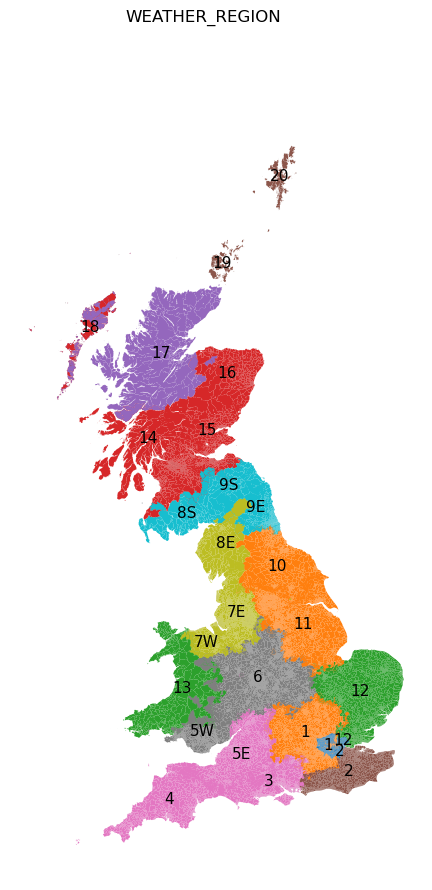

In [9]:
# Plot 2
ax = LSOA.plot(column='WEATHER_REGION', figsize=(10, 10),edgecolor='none',linewidth=0 )
ax.figure.suptitle('WEATHER_REGION')
ax.axis('off')

for idx, row in grouped.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, idx, 
            fontsize=11, ha='center', va='center', color='black');


In [ ]:
data['E_HEAT_2ND_HEATPUMP_prop']

In [27]:
LSOA['COUNTRY'].unique()

array(['England and Wales', 'Scotland'], dtype=object)

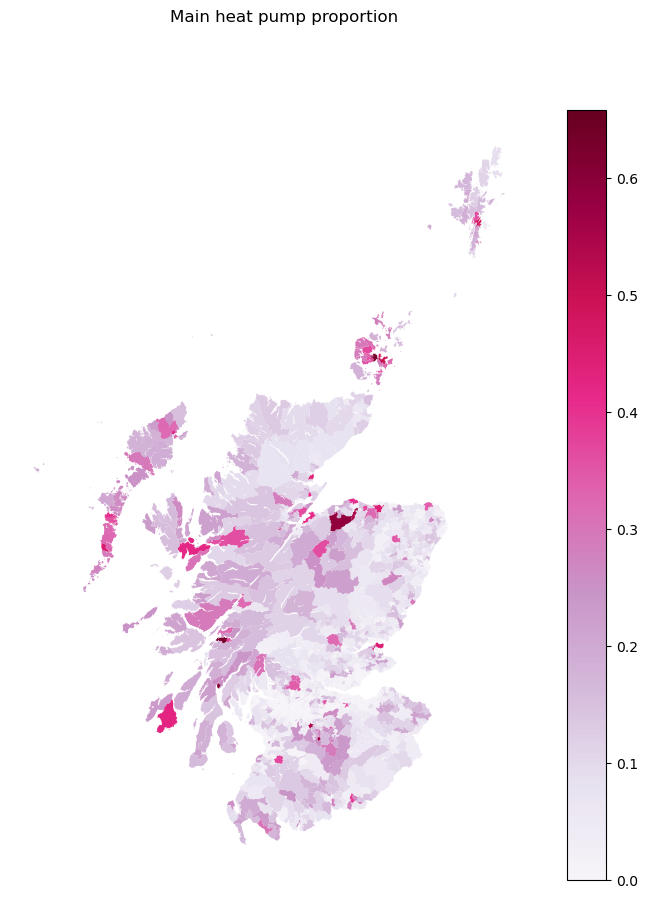

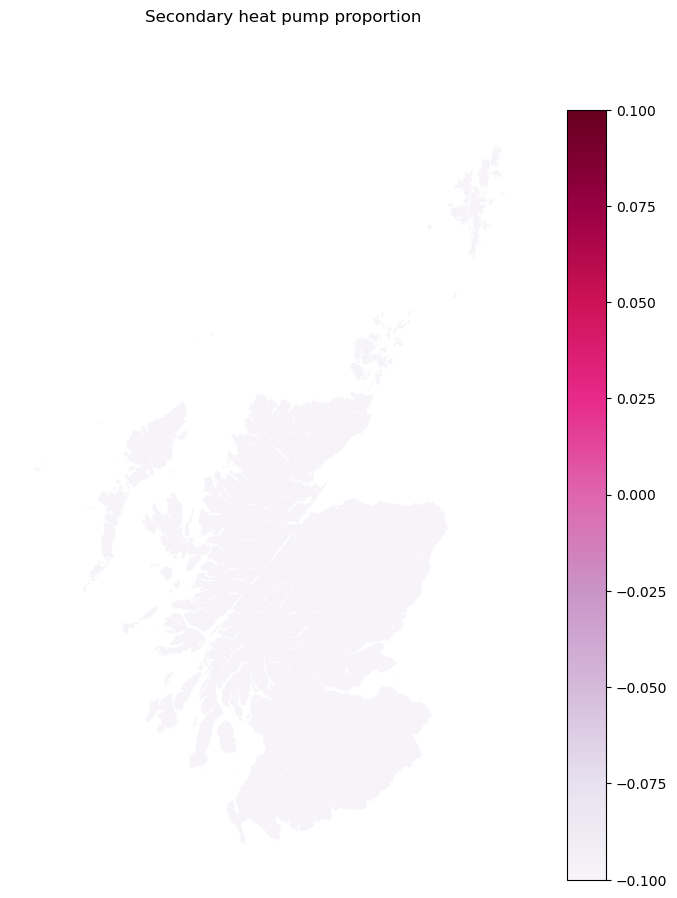

In [28]:

# Plot 1
ax = LSOA[LSOA['COUNTRY']=='Scotland'].plot(column='E_HEAT_MAIN_HEATPUMP_prop', cmap='PuRd', legend=True, figsize=(10, 10), edgecolor='none',linewidth=0 )
ax.figure.suptitle('Main heat pump proportion')
ax.axis('off');

# Plot 1
ax = LSOA[LSOA['COUNTRY']=='Scotland'].plot(column='E_HEAT_2ND_HEATPUMP_prop', cmap='PuRd', legend=True, figsize=(10, 10), edgecolor='none',linewidth=0 )
ax.figure.suptitle('Secondary heat pump proportion')
ax.axis('off');


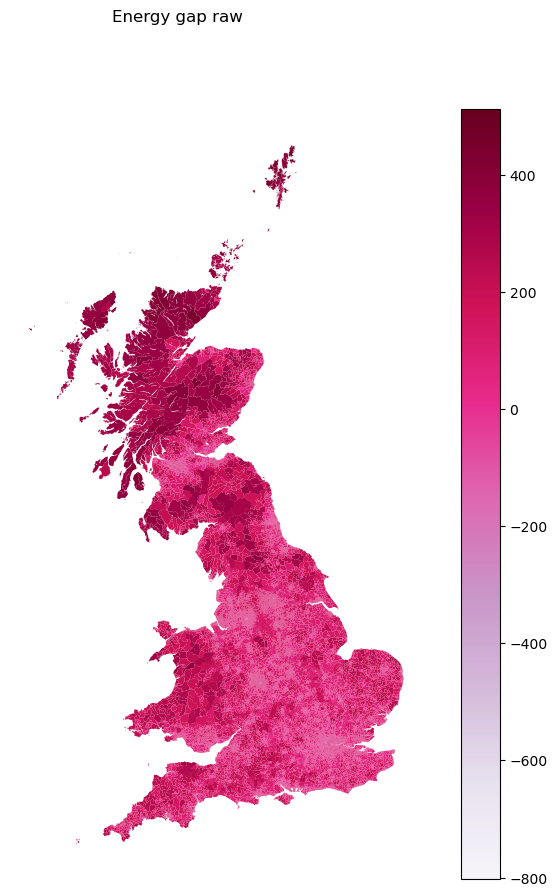

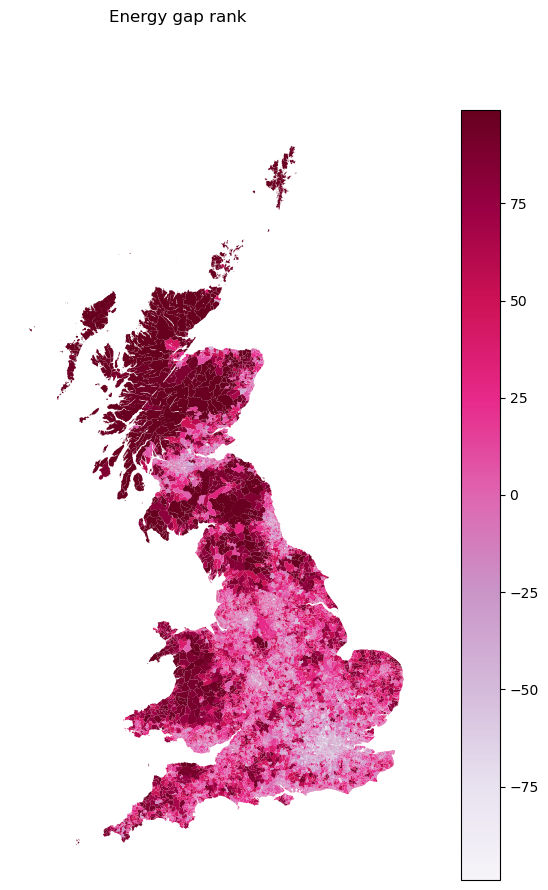

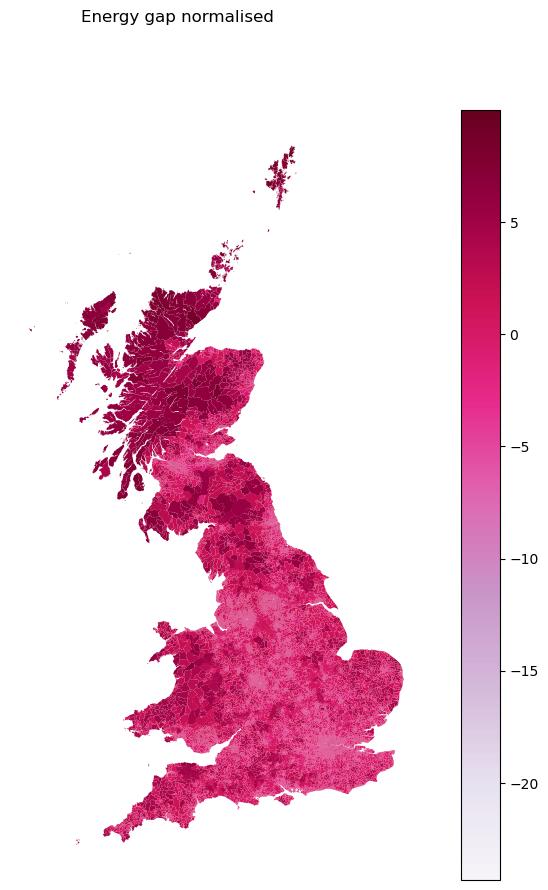

In [24]:

# Plot 1
ax = LSOA.plot(column='D_GAP_raw', cmap='PuRd', legend=True, figsize=(10, 10), edgecolor='none',linewidth=0 )
ax.figure.suptitle('Energy gap raw')
ax.axis('off');


# Plot 2
ax = LSOA.plot(column='D_GAP_rank', cmap='PuRd', legend=True, figsize=(10, 10),edgecolor='none',linewidth=0 )
ax.figure.suptitle('Energy gap rank')
ax.axis('off');

# Plot 2
ax = LSOA.plot(column= 'D_GAP_normalised', cmap='PuRd', legend=True, figsize=(10, 10),edgecolor='none',linewidth=0 )
ax.figure.suptitle('Energy gap normalised')
ax.axis('off');


In [ ]:
#data['E_FloorArea_mean'] = np.log(data['E_FloorArea_mean'])

In [10]:
def plot_lm_by_hue(data, dep_vars, hue_var, labels, palette='PuRd', scatter_s=2, scatter_alpha=0.1,
                   line_width=2, height=6, aspect=1.2):
    for dep_var in dep_vars:
        g = sns.lmplot(
            x='E_FloorArea_mean',
            y=dep_var,
            data=data,
            hue=hue_var,
            palette=palette,
            scatter_kws={'s': scatter_s, 'alpha': scatter_alpha},
            line_kws={'linewidth': line_width}, 
            height=height,
            aspect=aspect
        )
        
        # Get labels or fallback to variable names
        x_label = labels.get('E_FloorArea_mean', 'E_FloorArea_mean')
        y_label = labels.get(dep_var, dep_var)
        legend_title = labels.get(hue_var, hue_var)
        
        # Set axis labels
        g.set_axis_labels(x_label, y_label)
        
        # Set legend title
        g._legend.set_title(legend_title)
        
        # Set figure title
        g.fig.suptitle(f'{x_label} vs {y_label}', fontsize=14)
        
        # Adjust layout
        g.fig.tight_layout()
        g.fig.subplots_adjust(top=0.9)
        


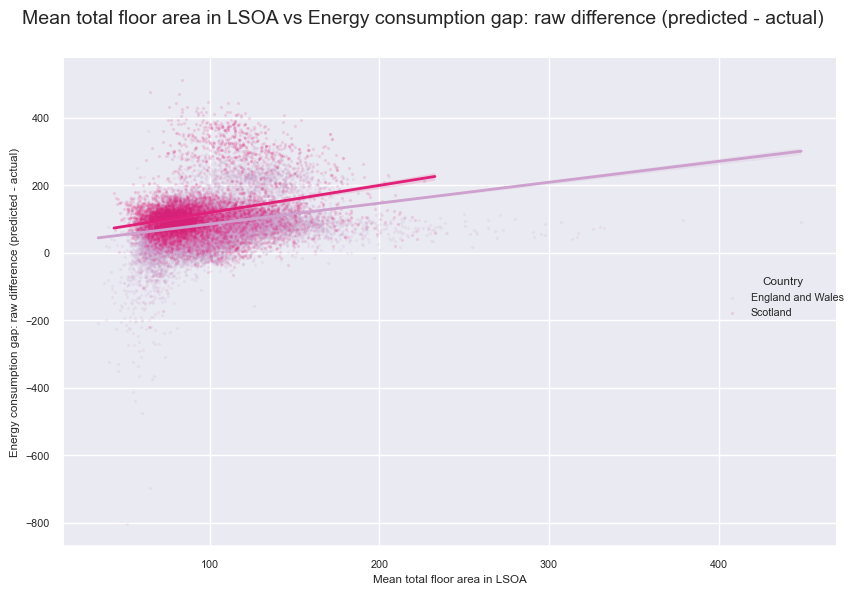

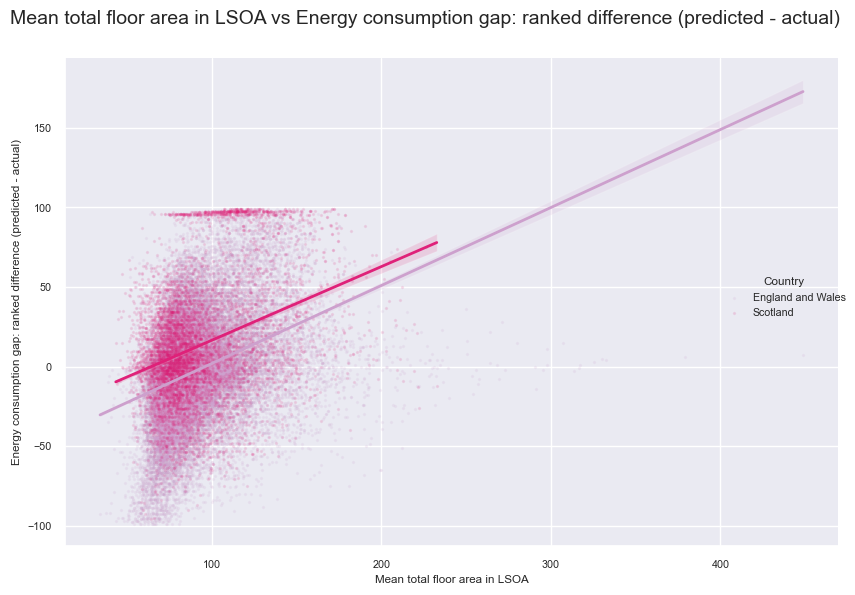

In [189]:
dep_vars = ['D_GAP_raw', 'D_GAP_rank']
hue_var = 'COUNTRY'

plot_lm_by_hue(data, dep_vars, hue_var, labels)

In [9]:

def add_quantile_column(df, variable, q=5, labels=None, new_col_name=None):
    """
    Adds a new column with quantile bins to the DataFrame.

    Parameters:
    - df: pandas DataFrame
    - variable: name of the column to quantile
    - q: number of quantiles (e.g., 5 for quintiles)
    - labels: list of labels for quantiles, optional
    - new_col_name: optional name for the new column
    """
    if not new_col_name:
        new_col_name = f"{variable}_quantile"

    data[new_col_name] = pd.qcut(df[variable], q=q, labels=labels)
    return df


# Create quintiles (5 bins)
data = add_quantile_column(data, variable='E_EFFICIENCY_mean', q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'],new_col_name = 'E_EFF_quant')


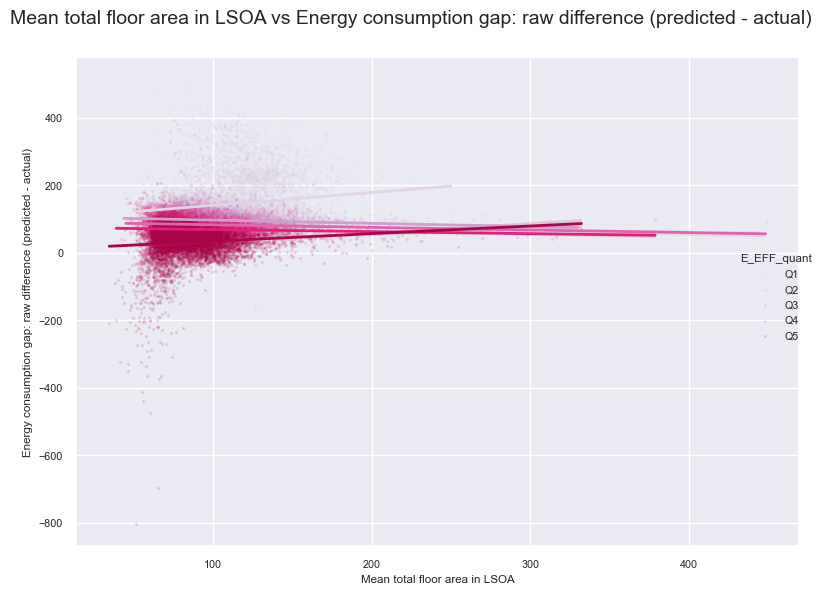

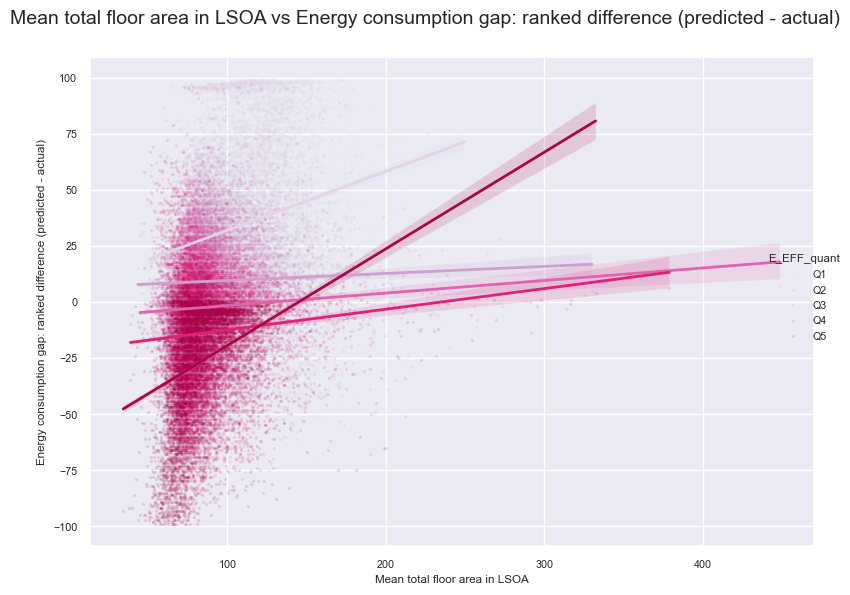

In [191]:
dep_vars = ['D_GAP_raw', 'D_GAP_rank']
hue_var = 'E_EFF_quant'

plot_lm_by_hue(data, dep_vars, hue_var, labels)

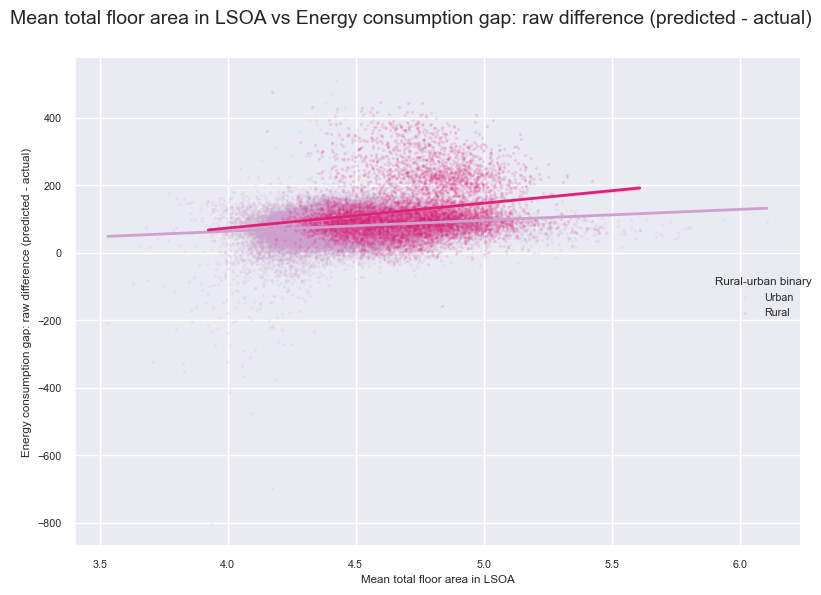

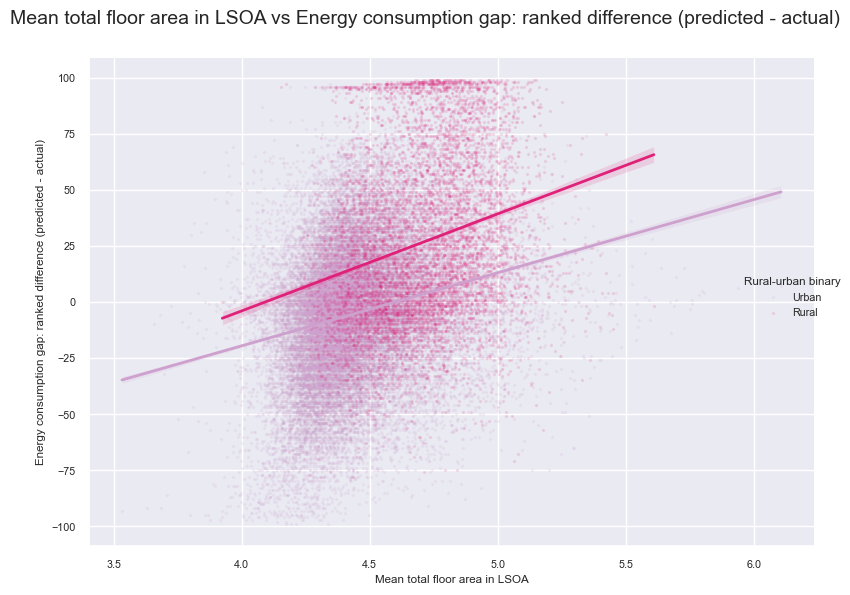

In [ ]:
dep_vars = ['D_GAP_raw', 'D_GAP_rank']
hue_var = 'C_RurUrb_bin'

plot_lm_by_hue(data, dep_vars, hue_var, labels)

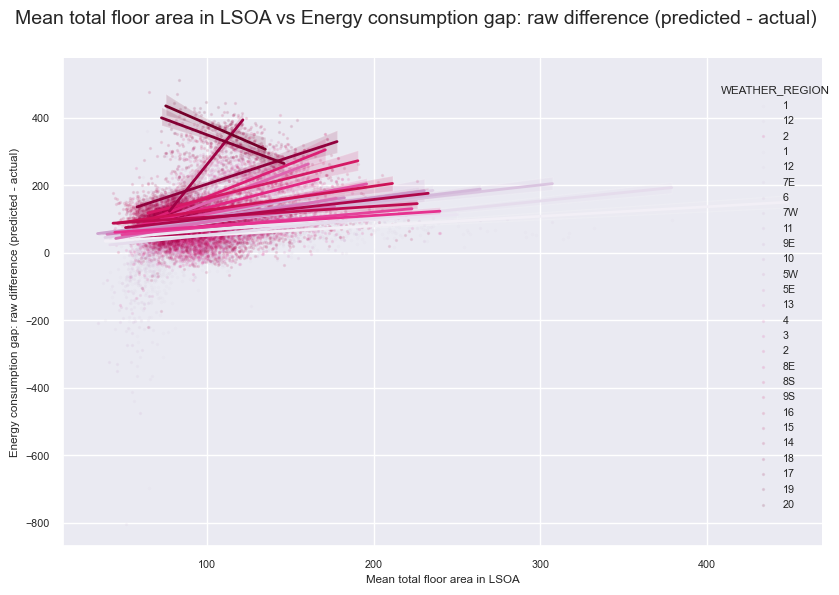

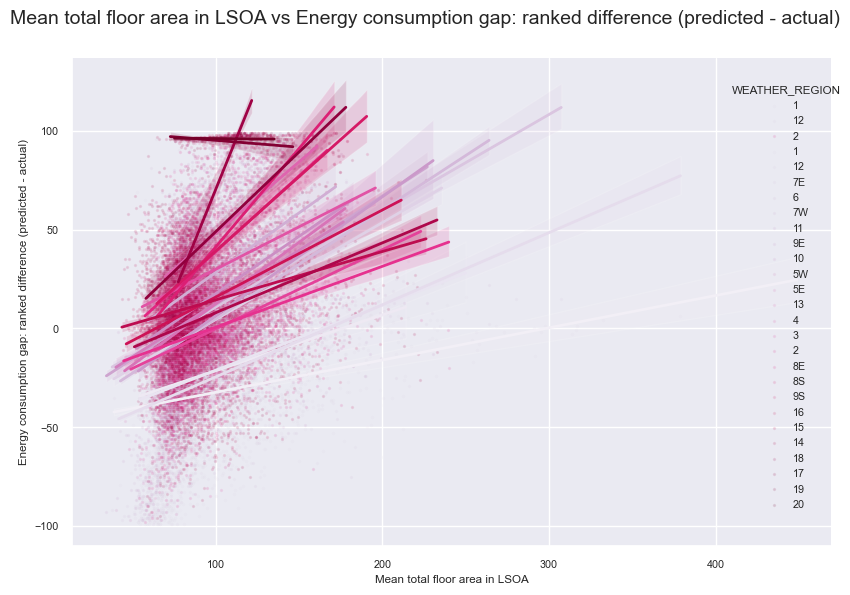

In [194]:
dep_vars = ['D_GAP_raw', 'D_GAP_rank']
hue_var = 'WEATHER_REGION'

plot_lm_by_hue(data, dep_vars, hue_var, labels)

In [10]:
def annova_simple(data, dep_var, group_var):
    formula = f'Q("{dep_var}") ~ C({group_var})'
    model = smf.ols(formula, data=data).fit()

    results = []
    for term in model.params.index:
        coef = model.params[term]
        pval = model.pvalues[term]

        # Significance stars
        if pval < 0.001:
            stars = '***'
        elif pval < 0.01:
            stars = '**'
        elif pval < 0.05:
            stars = '*'
        else:
            stars = ''

        results.append({
            'Term': term,
            'Coefficient': round(coef, 4),
            'p-value': f"{pval:.3e}",
            'Significance': stars
        })

    return pd.DataFrame(results)


In [7]:
df_results1 = annova_simple(
    data=data,
    dep_var='D_GAP_rank',
    group_var='C_RurUrb_bin'
)

df_results1

Term  Coefficient    p-value Significance
0                 Intercept      26.6178  0.000e+00          ***
1  C(C_RurUrb_bin)[T.Urban]     -31.6882  0.000e+00          ***

In [9]:
df_results2 = annova_simple(
    data=data,
    dep_var='D_GAP_rank',
    group_var='COUNTRY'
)

df_results2

Term  Coefficient     p-value Significance
0               Intercept      -2.4451   9.950e-44          ***
1  C(COUNTRY)[T.Scotland]      14.9584  6.167e-255          ***

In [17]:
df_results1 = annova_simple(
    data=data,
    dep_var='D_GAP_rank',
    group_var='E_EFF_quant'
)

df_results1

Term  Coefficient    p-value Significance
0             Intercept      33.3831  0.000e+00          ***
1  C(E_EFF_quant)[T.Q2]     -24.4413  0.000e+00          ***
2  C(E_EFF_quant)[T.Q3]     -35.7374  0.000e+00          ***
3  C(E_EFF_quant)[T.Q4]     -47.3855  0.000e+00          ***
4  C(E_EFF_quant)[T.Q5]     -59.4746  0.000e+00          ***

In [72]:
df_results1 = annova_simple(
    data=data,
    dep_var='D_GAP_rank',
    group_var='WEATHER_REGION'
)

df_results1

Term  Coefficient     p-value Significance
0                 Intercept     -30.0771   0.000e+00          ***
1   C(WEATHER_REGION)[T.10]      44.4824   0.000e+00          ***
2   C(WEATHER_REGION)[T.11]      36.7058   0.000e+00          ***
3   C(WEATHER_REGION)[T.12]      28.4620   0.000e+00          ***
4   C(WEATHER_REGION)[T.13]      82.2784   0.000e+00          ***
5   C(WEATHER_REGION)[T.14]      34.2085   0.000e+00          ***
6   C(WEATHER_REGION)[T.15]      42.5678   0.000e+00          ***
7   C(WEATHER_REGION)[T.16]      45.7290   0.000e+00          ***
8   C(WEATHER_REGION)[T.17]      82.8959   0.000e+00          ***
9   C(WEATHER_REGION)[T.18]     113.9104  4.371e-121          ***
10  C(WEATHER_REGION)[T.19]     124.6288  5.837e-117          ***
11   C(WEATHER_REGION)[T.2]      25.8830   0.000e+00          ***
12  C(WEATHER_REGION)[T.20]     126.1104  1.036e-123          ***
13   C(WEATHER_REGION)[T.3]      27.1864  1.304e-268          ***
14   C(WEATHER_REGION)[T.4]      58.3548   0.000e+00          ***
15  C(WEATHER_REGION)[T.5E]      40.0128   0.000e+00          ***
16  C(WEATHER_REGION)[T.5W]      38.0640   0.000e+00          ***
17   C(WEATHER_REGION)[T.6]      29.9185   0.000e+00          ***
18  C(WEATHER_REGION)[T.7E]      36.1484   0.000e+00          ***
19  C(WEATHER_REGION)[T.7W]      54.8791  1.416e-288          ***
20  C(WEATHER_REGION)[T.8E]      68.2881   0.000e+00          ***
21  C(WEATHER_REGION)[T.8S]      72.0332  2.508e-265          ***
22  C(WEATHER_REGION)[T.9E]      29.5554  2.073e-189          ***
23  C(WEATHER_REGION)[T.9S]      73.3648  1.024e-198          ***

In [18]:
data.loc[:,['E_EFFICIENCY_mean','E_EFF_quant']]

E_EFFICIENCY_mean E_EFF_quant
0                  65.28          Q3
1                  74.89          Q5
2                  70.91          Q5
3                  73.92          Q5
4                  63.59          Q2
...                  ...         ...
42636              77.91          Q5
42637              69.80          Q5
42638              66.94          Q4
42639              79.37          Q5
42640              83.47          Q5

[42641 rows x 2 columns]

In [349]:
simple = pd.concat([df_results1, df_results2]).to_csv('./../../Volumes/Extreme_SSD/WORK/EPC/gas_consumption/anova_simple.csv')

In [11]:
data['WEATHER_REGION'] = data['WEATHER_REGION'].astype(str)

In [13]:

def annova_with_controls(data, dep_var, group_vars, continuous_var, control_vars=None):
    results = []

    for group_var in group_vars:
        # Build control part of the formula
        control_terms = ''
        if control_vars:
            control_terms = ' + ' + ' + '.join([f'C({v})' for v in control_vars])

        # Full formula with interaction
        formula = f'Q("{dep_var}") ~ {continuous_var} * C({group_var}){control_terms}'
        model = smf.ols(formula, data=data).fit()

        for term in model.params.index:
            coef = model.params[term]
            pval = model.pvalues[term]

            # Significance stars
            if pval < 0.001:
                stars = '***'
            elif pval < 0.01:
                stars = '**'
            elif pval < 0.05:
                stars = '*'
            else:
                stars = ''

            results.append({
                'Grouping Variable': group_var,
                'Term': term,
                'Coefficient': round(coef, 4),
                'p-value': f"{pval:.3e}",
                'Significance': stars
            })

    return pd.DataFrame(results)


In [351]:
group_vars = ['C_RurUrb_bin']
dep_var = 'D_GAP_raw'
continuous_var = 'E_FloorArea_mean'
control_vars = ['COUNTRY']  # Add any additional controls here

all_results = annova_with_controls(data, dep_var, group_vars, continuous_var, control_vars)

all_results.to_csv('./../../Volumes/Extreme_SSD/WORK/EPC/gas_consumption/anova_controls.csv')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [352]:
group_vars = ['COUNTRY']
dep_var = 'D_GAP_raw'
continuous_var = 'E_FloorArea_mean'
control_vars = ['C_RurUrb_bin']  # Add any additional controls here

all_results = annova_with_controls(data, dep_var, group_vars, continuous_var, control_vars)

all_results.to_csv('./../../Volumes/Extreme_SSD/WORK/EPC/gas_consumption/anova_controls2.csv')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [354]:
group_vars = ['REGION']
dep_var = 'D_GAP_raw'
continuous_var = 'E_FloorArea_mean'
control_vars = ['C_RurUrb_bin','COUNTRY']  # Add any additional controls here

all_results = annova_with_controls(data, dep_var, group_vars, continuous_var, control_vars)

all_results.to_csv('./../../Volumes/Extreme_SSD/WORK/EPC/gas_consumption/anova_controls3.csv')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [200]:
group_vars = ['E_EFF_quant']
dep_var = 'D_GAP_raw'
continuous_var = 'E_FloorArea_mean'
control_vars = ['C_RurUrb_bin','COUNTRY']  # Add any additional controls here

all_results = annova_with_controls(data, dep_var, group_vars, continuous_var, control_vars)
all_results


Grouping Variable                                   Term  Coefficient  \
0        E_EFF_quant                              Intercept     157.8587   
1        E_EFF_quant                   C(E_EFF_quant)[T.Q2]     -14.4301   
2        E_EFF_quant                   C(E_EFF_quant)[T.Q3]     -35.6491   
3        E_EFF_quant                   C(E_EFF_quant)[T.Q4]     -53.3150   
4        E_EFF_quant                   C(E_EFF_quant)[T.Q5]    -103.0824   
5        E_EFF_quant               C(C_RurUrb_bin)[T.Urban]     -30.2419   
6        E_EFF_quant                 C(COUNTRY)[T.Scotland]      41.7311   
7        E_EFF_quant                       E_FloorArea_mean      -0.0151   
8        E_EFF_quant  E_FloorArea_mean:C(E_EFF_quant)[T.Q2]      -0.2471   
9        E_EFF_quant  E_FloorArea_mean:C(E_EFF_quant)[T.Q3]      -0.1902   
10       E_EFF_quant  E_FloorArea_mean:C(E_EFF_quant)[T.Q4]      -0.1818   
11       E_EFF_quant  E_FloorArea_mean:C(E_EFF_quant)[T.Q5]      -0.0279   

       p-value Significance  
0    0.000e+00          ***  
1    1.645e-09          ***  
2    4.990e-50          ***  
3   2.508e-108          ***  
4    0.000e+00          ***  
5    0.000e+00          ***  
6    0.000e+00          ***  
7    3.409e-01               
8    1.724e-26          ***  
9    2.991e-15          ***  
10   3.008e-13          ***  
11   2.738e-01

In [28]:
group_vars = ['WEATHER_REGION']
dep_var = 'D_GAP_rank'
continuous_var = 'E_FloorArea_mean'
control_vars = ['C_RurUrb_bin','COUNTRY']  # Add any additional controls here

all_results = annova_with_controls(data, dep_var, group_vars, continuous_var, control_vars)
all_results


Grouping Variable                                      Term  Coefficient  \
0     WEATHER_REGION                                 Intercept     -37.5293   
1     WEATHER_REGION                   C(WEATHER_REGION)[T.10]      23.3449   
2     WEATHER_REGION                   C(WEATHER_REGION)[T.11]      21.7951   
3     WEATHER_REGION                   C(WEATHER_REGION)[T.12]      17.3311   
4     WEATHER_REGION                   C(WEATHER_REGION)[T.13]      36.9517   
5     WEATHER_REGION                   C(WEATHER_REGION)[T.14]      38.5150   
6     WEATHER_REGION                   C(WEATHER_REGION)[T.15]      57.4154   
7     WEATHER_REGION                   C(WEATHER_REGION)[T.16]      40.3424   
8     WEATHER_REGION                   C(WEATHER_REGION)[T.17]      44.0534   
9     WEATHER_REGION                   C(WEATHER_REGION)[T.18]     -37.8466   
10    WEATHER_REGION                   C(WEATHER_REGION)[T.19]     177.2616   
11    WEATHER_REGION                    C(WEATHER_REGION)[T.2]      29.9596   
12    WEATHER_REGION                   C(WEATHER_REGION)[T.20]     181.5252   
13    WEATHER_REGION                    C(WEATHER_REGION)[T.3]      23.9676   
14    WEATHER_REGION                    C(WEATHER_REGION)[T.4]      55.4359   
15    WEATHER_REGION                   C(WEATHER_REGION)[T.5E]      19.5684   
16    WEATHER_REGION                   C(WEATHER_REGION)[T.5W]      21.1556   
17    WEATHER_REGION                    C(WEATHER_REGION)[T.6]      16.7672   
18    WEATHER_REGION                   C(WEATHER_REGION)[T.7E]      23.8570   
19    WEATHER_REGION                   C(WEATHER_REGION)[T.7W]      32.1396   
20    WEATHER_REGION                   C(WEATHER_REGION)[T.8E]      29.2673   
21    WEATHER_REGION                   C(WEATHER_REGION)[T.8S]      17.9996   
22    WEATHER_REGION                   C(WEATHER_REGION)[T.9E]       4.5446   
23    WEATHER_REGION                   C(WEATHER_REGION)[T.9S]      36.9366   
24    WEATHER_REGION                  C(C_RurUrb_bin)[T.Urban]     -16.3471   
25    WEATHER_REGION                    C(COUNTRY)[T.Scotland]      -7.1374   
26    WEATHER_REGION                          E_FloorArea_mean       0.2506   
27    WEATHER_REGION  E_FloorArea_mean:C(WEATHER_REGION)[T.10]       0.1725   
28    WEATHER_REGION  E_FloorArea_mean:C(WEATHER_REGION)[T.11]       0.1511   
29    WEATHER_REGION  E_FloorArea_mean:C(WEATHER_REGION)[T.12]       0.0767   
30    WEATHER_REGION  E_FloorArea_mean:C(WEATHER_REGION)[T.13]       0.2931   
31    WEATHER_REGION  E_FloorArea_mean:C(WEATHER_REGION)[T.14]       0.0279   
32    WEATHER_REGION  E_FloorArea_mean:C(WEATHER_REGION)[T.15]      -0.1006   
33    WEATHER_REGION  E_FloorArea_mean:C(WEATHER_REGION)[T.16]       0.0667   
34    WEATHER_REGION  E_FloorArea_mean:C(WEATHER_REGION)[T.17]       0.3436   
35    WEATHER_REGION  E_FloorArea_mean:C(WEATHER_REGION)[T.18]       1.3562   
36    WEATHER_REGION  E_FloorArea_mean:C(WEATHER_REGION)[T.19]      -0.5503   
37    WEATHER_REGION   E_FloorArea_mean:C(WEATHER_REGION)[T.2]      -0.0712   
38    WEATHER_REGION  E_FloorArea_mean:C(WEATHER_REGION)[T.20]      -0.6045   
39    WEATHER_REGION   E_FloorArea_mean:C(WEATHER_REGION)[T.3]       0.0102   
40    WEATHER_REGION   E_FloorArea_mean:C(WEATHER_REGION)[T.4]      -0.0335   
41    WEATHER_REGION  E_FloorArea_mean:C(WEATHER_REGION)[T.5E]       0.1719   
42    WEATHER_REGION  E_FloorArea_mean:C(WEATHER_REGION)[T.5W]       0.1694   
43    WEATHER_REGION   E_FloorArea_mean:C(WEATHER_REGION)[T.6]       0.1302   
44    WEATHER_REGION  E_FloorArea_mean:C(WEATHER_REGION)[T.7E]       0.1421   
45    WEATHER_REGION  E_FloorArea_mean:C(WEATHER_REGION)[T.7W]       0.2065   
46    WEATHER_REGION  E_FloorArea_mean:C(WEATHER_REGION)[T.8E]       0.3061   
47    WEATHER_REGION  E_FloorArea_mean:C(WEATHER_REGION)[T.8S]       0.5174   
48    WEATHER_REGION  E_FloorArea_mean:C(WEATHER_REGION)[T.9E]       0.2805   
49    WEATHER_REGION  E_FloorArea_mean:C(WEATHER_REGI

# Corrs

In [29]:
x = data.select_dtypes(include=['number']).columns.tolist()
x

['A_GasMeter_num',
 'A_Gas_Consump_tot',
 'A_Gas_Consump_mean',
 'A_Gas_Consump_med',
 'A_GasNonMeter_num',
 'A_ElecMeter_num',
 'A_Elec_Consump_tot',
 'A_Elec_Consump_mean',
 'A_Elec_Consump_med',
 'C_DomProp_num',
 'C_DomGasMeter_num',
 'C_OffGrid_num',
 'C_OffGrid_prop',
 'E_FloorArea_med',
 'E_FloorArea_mean',
 'E_EPC_num',
 'D_EPC_vs_Census_prop',
 'C_Residents_tot',
 'D_Gas_Elec_Meter_ratio',
 'D_Act_Ener_Consump_mean',
 'D_Act_Gas_Consump_m2_mean',
 'D_Act_Gas_Consump_m2_med',
 'D_Act_Elec_Consump_m2_mean',
 'D_Act_Elec_Consump_m2_med',
 'D_Act_Ener_Consump_m2_mean',
 'D_Act_Rank_Gas_m2',
 'D_Act_Rank_Elec_m2',
 'D_Act_Rank_Ener_m2_averaged',
 'D_Act_Rank_Ener_m2',
 'E_MULTI_GLAZE_PROP_med',
 'E_MULTI_GLAZE_PROP_mean',
 'E_EXTENSION_COUNT_mean',
 'E_PHOTO_SUPPLY_prop',
 'E_ROOF_INSULATION_prop',
 'E_THATCHED_prop',
 'E_OpenFire_mean',
 'E_OpenFire_prop',
 'E_HEAT_MAIN_ELECTRIC_prop',
 'E_HEAT_MAIN_SOLIDFUEL_prop',
 'E_HEAT_MAIN_OTHER_prop',
 'E_HEAT_MAIN_ELECTRIC_OTHER_prop',
 '

In [12]:
base1 = ['A_GasMeter_num',
 'A_Gas_Consump_tot',
 'A_Gas_Consump_mean',
 'A_GasNonMeter_num',
 'A_ElecMeter_num',
 'C_DomProp_num',
 'C_DomGasMeter_num',
 'C_OffGrid_num',
 'C_OffGrid_prop',
 'E_FloorArea_mean',
 'E_EPC_num',
 'D_EPC_vs_Census_prop',
 'C_Residents_tot','D_Gas_Elec_Meter_ratio']

house = ['E_MULTI_GLAZE_PROP_med',
 'E_MULTI_GLAZE_PROP_mean',
 'E_EXTENSION_COUNT_mean',
 'E_PHOTO_SUPPLY_prop',
 'E_PHOTO_SUPPLY_mean',
 'E_ROOF_INSULATION_prop',
 'E_THATCHED_prop',
 'E_OpenFire_mean',
 'E_OpenFire_prop',
 'E_HEAT_MAIN_ELECTRIC_prop',
 'E_HEAT_MAIN_SOLIDFUEL_prop',
 'E_HEAT_MAIN_OTHER_prop',
 'E_HEAT_MAIN_ELECTRIC_OTHER_prop',
 'E_HEAT_MAIN_ELECTRIC_SOLID_prop',
 'E_HEAT_MAIN_SOLID_OTHER_prop',
 'E_HEAT_MAIN_HEATPUMP_prop',
 'E_HEAT_2ND_ELECTRIC_prop',
 'E_HEAT_2ND_SOLIDFUEL_prop',
 'E_HEAT_2ND_OTHER_prop',
 'E_HEAT_2ND_ELECTRIC_OTHER_prop',
 'E_HEAT_2ND_ELECTRIC_SOLID_prop',
 'E_HEAT_2ND_SOLID_OTHER_prop',
 'E_HEAT_2ND_HEATPUMP_prop',
 'E_MAINS_GAS_prop',
 'E_SOLID_FUEL_HIGH',
 'E_TENURE_OWNED_prop',
 'E_TENURE_PRIVRENT_prop',
 'E_TENURE_SOCRENT_prop',
 'E_TYPE_DETACHED_prop',
 'E_TYPE_ENDTERRACE_prop',
 'E_TYPE_MIDTERRACE_prop',
 'E_TYPE_SEMI_prop',
 'E_TYPE_BUNGALOW_prop',
 'E_TYPE_FLAT_prop',
 'E_TYPE_HOUSE_prop',
 'E_TYPE_MAISONETTE_prop',
 'E_TYPE_PARKHOME_prop',
 'E_AGE_1976_2002_prop',
 'E_AGE_1930_1949_prop',
 'E_AGE_pre1929_prop',
 'E_AGE_1950_1975_prop',
 'E_AGE_post2003',
 'E_AGE_mean',
 'E_EFFICIENCY_mean',
 'E_EFFICIENCY_BAND_mean',
 'E_Pot_Ener_Consump_m2_mean',
 'E_TYPE_TOPFLOORFLAT_prop',
 'E_TRANS_TYPE_OTHER_prop',
 'E_TRANS_TYPE_GOVDEAL_prop',
 'E_CROWDING']
 

census = [ 'C_ALL_HOUSEHOLDS_tot',
 'C_ALL_RESIDENTS_tot',
 'C_USUAL_ADULT_RESIDENTS_tot',
 'C_EMPLOYED_tot',
 'C_AGE_UNDER19_prop',
 'C_AGE_20_64_prop',
 'C_AGE_65PLUS_prop',
 'C_CENSUS_DEPRIVATION_EW',
 'C_DISABLED_prop',
 'C_ECON_EMPLOYED_prop',
 'C_ECON_UNEMP_prop',
 'C_ECON_STUD_prop',
 'C_ECON_RETIRED_prop',
 'C_ECON_CARER_prop',
 'C_ECON_SICK_prop',
 'C_ECON_OTHER_prop',
 'C_ETHNIC_ASIAN_prop',
 'C_ETHNIC_BLACK_prop',
 'C_ETHNIC_MIXED_prop',
 'C_ETHNIC_WHITE_prop',
 'C_ETHNIC_WHITEOTH_prop',
 'C_HHCOMP_SINGLE_prop',
 'C_OVER_OCCUPIED_prop',
 'C_UNDER_OCCUPIED_prop',
 'C_POPDENSITY',
 'C_SECONDHOMES',
 'C_TENURE_OWNED',
 'C_TENURE_OUTRIGHT',
 'C_TENURE_MORTGAGE',
 'C_TENURE_SOCRENT',
 'C_TENURE_COUNCIL',
 'C_TENURE_OTHERSOC',
 'C_TENURE_PRIVRENT',
 'C_WORKFROMHOME',
 'C_WORKOFFSHORE',
 'C_DEP_rank',
 'C_DEP_percentile',
 'C_DEP_decile',
 'C_DEP_quintile',]

gap = [
 'D_GAP_raw',
 'D_GAP_rank','D_GAP_normalised']

cats = ['WEATHER_REGION','C_RurUrb_bin','COUNTRY']

In [48]:
data.columns

Index(['LSOA_CODE_GB', 'LSOA_NAME_GB', 'A_GasMeter_num', 'A_Gas_Consump_tot',
       'A_Gas_Consump_mean', 'A_Gas_Consump_med', 'A_GasNonMeter_num',
       'A_ElecMeter_num', 'A_Elec_Consump_tot', 'A_Elec_Consump_mean',
       ...
       'C_RurUrb_bin', 'WEATHER_REGION', 'C_DEP_quintile', 'E_SOLID_FUEL_HIGH',
       'E_PropAge_modal', 'D_Pred_Rank_Ener_m2_mean', 'D_GAP_raw',
       'D_GAP_rank', 'D_GAP_normalised', 'WEATHER_REGION2'],
      dtype='object', length=148)

Text(0.5, 0.98, 'Base')

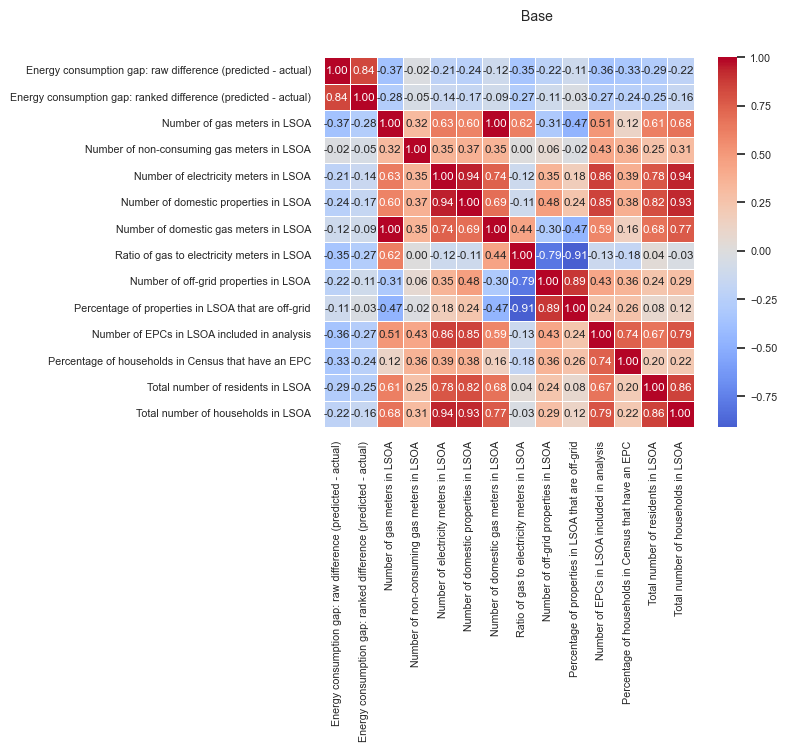

In [23]:

# Select only numeric columns (optional, but often useful)
numeric_data = data.loc[:,gap+base1]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Apply human-readable labels from the dictionary
corr_matrix.rename(index=labels, columns=labels, inplace=True)

# Create the heatmap
sns.set(font_scale=0.7)
ax = sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values
    fmt=".2f",             # Format the annotation
    cmap='coolwarm',       # Color palette (try 'viridis', 'magma', etc.)
    center=0,              # Center the colormap at 0
    linewidths=0.5,        # Lines between boxes
    square=True            # Make cells square
)

ax.figure.suptitle('Base')
#plt.tight_layout();


Text(0.5, 0.98, 'House1')

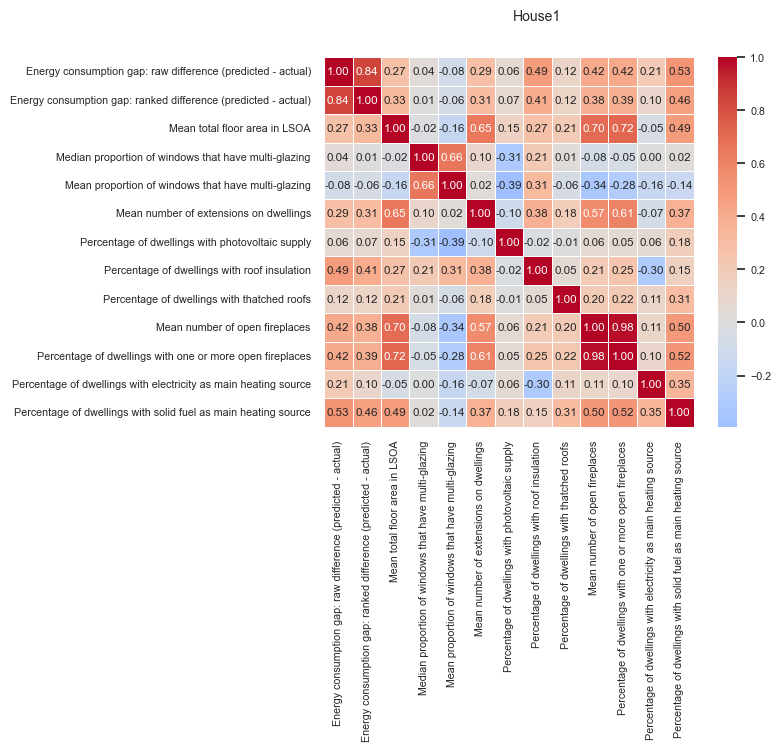

In [24]:
numeric_data = data.loc[:,gap+house[0:11]]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()


# Apply human-readable labels from the dictionary
corr_matrix.rename(index=labels, columns=labels, inplace=True)

# Create the heatmap

sns.set(font_scale=0.7)
ax = sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values
    fmt=".2f",             # Format the annotation
    cmap='coolwarm',       # Color palette (try 'viridis', 'magma', etc.)
    center=0,              # Center the colormap at 0
    linewidths=0.5,        # Lines between boxes
    square=True            # Make cells square
)

ax.figure.suptitle('House1')

Text(0.5, 0.98, 'House1')

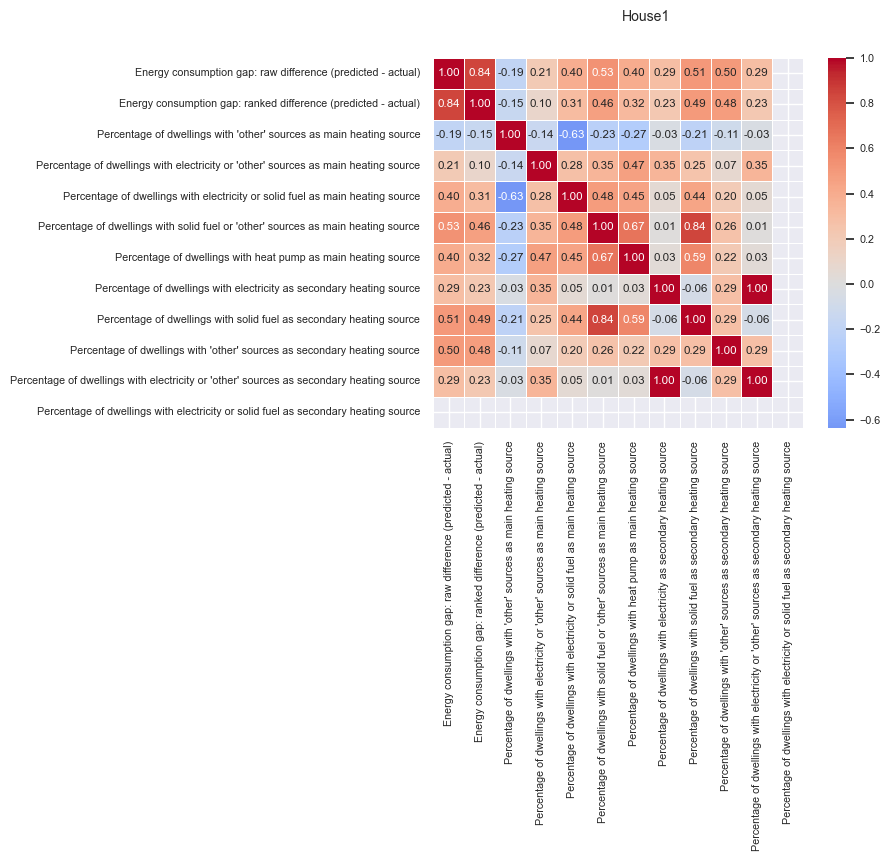

In [361]:
numeric_data = data.loc[:,gap+house[11:21]]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()


# Apply human-readable labels from the dictionary
corr_matrix.rename(index=labels, columns=labels, inplace=True)

# Create the heatmap

sns.set(font_scale=0.7)
ax = sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values
    fmt=".2f",             # Format the annotation
    cmap='coolwarm',       # Color palette (try 'viridis', 'magma', etc.)
    center=0,              # Center the colormap at 0
    linewidths=0.5,        # Lines between boxes
    square=True            # Make cells square
)

ax.figure.suptitle('House1')

In [369]:
len(house)

54

Text(0.5, 0.98, 'House2')

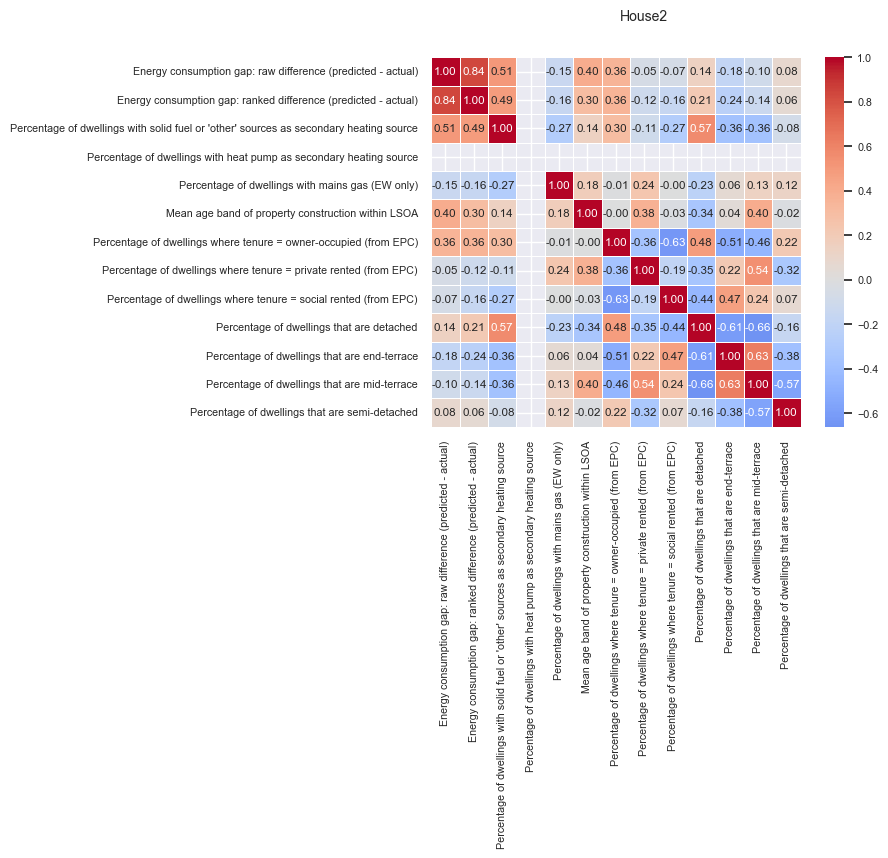

In [372]:
numeric_data = data.loc[:,gap+house[21:32]]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()


# Apply human-readable labels from the dictionary
corr_matrix.rename(index=labels, columns=labels, inplace=True)

# Create the heatmap

sns.set(font_scale=0.7)
ax = sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values
    fmt=".2f",             # Format the annotation
    cmap='coolwarm',       # Color palette (try 'viridis', 'magma', etc.)
    center=0,              # Center the colormap at 0
    linewidths=0.5,        # Lines between boxes
    square=True            # Make cells square
)

ax.figure.suptitle('House2')

Text(0.5, 0.98, 'House3')

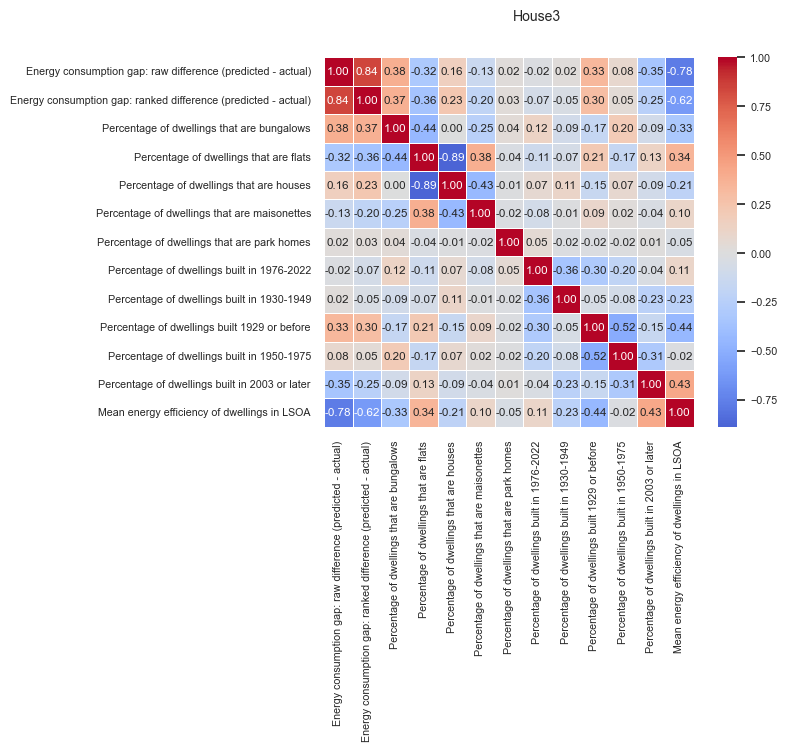

In [374]:
numeric_data = data.loc[:,gap+house[32:43]]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()


# Apply human-readable labels from the dictionary
corr_matrix.rename(index=labels, columns=labels, inplace=True)

# Create the heatmap
sns.set(font_scale=0.7)
ax = sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values
    fmt=".2f",             # Format the annotation
    cmap='coolwarm',       # Color palette (try 'viridis', 'magma', etc.)
    center=0,              # Center the colormap at 0
    linewidths=0.5,        # Lines between boxes
    square=True            # Make cells square
)

ax.figure.suptitle('House3')

Text(0.5, 0.98, 'House3')

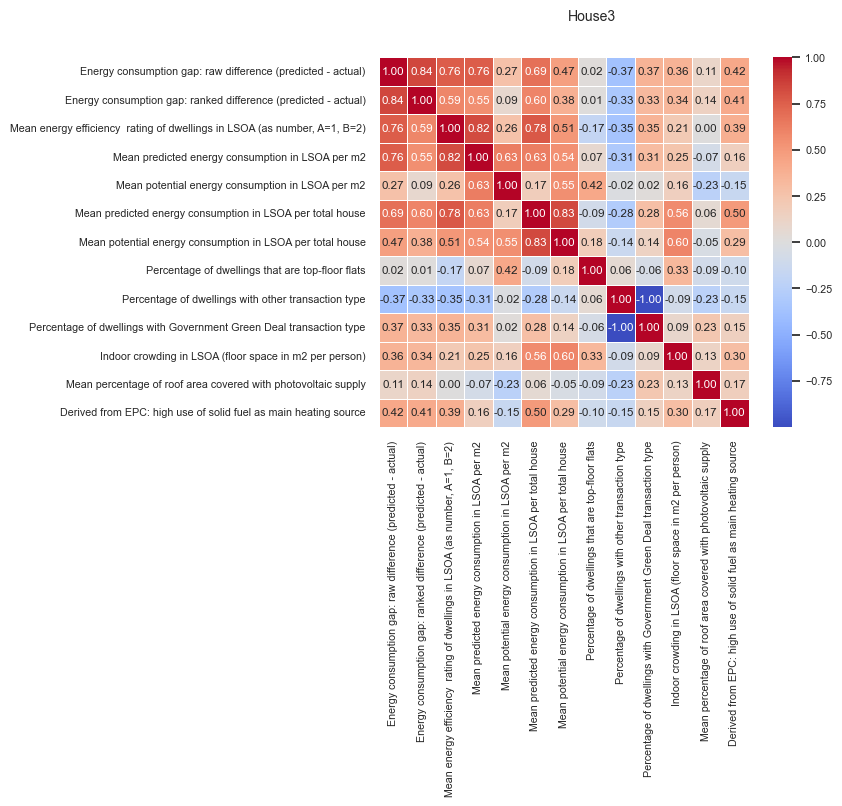

In [373]:
numeric_data = data.loc[:,gap+house[43:55]]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()


# Apply human-readable labels from the dictionary
corr_matrix.rename(index=labels, columns=labels, inplace=True)

# Create the heatmap
sns.set(font_scale=0.7)
ax = sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values
    fmt=".2f",             # Format the annotation
    cmap='coolwarm',       # Color palette (try 'viridis', 'magma', etc.)
    center=0,              # Center the colormap at 0
    linewidths=0.5,        # Lines between boxes
    square=True            # Make cells square
)

ax.figure.suptitle('House3')

In [375]:
len(census)

37

Text(0.5, 0.98, 'census1')

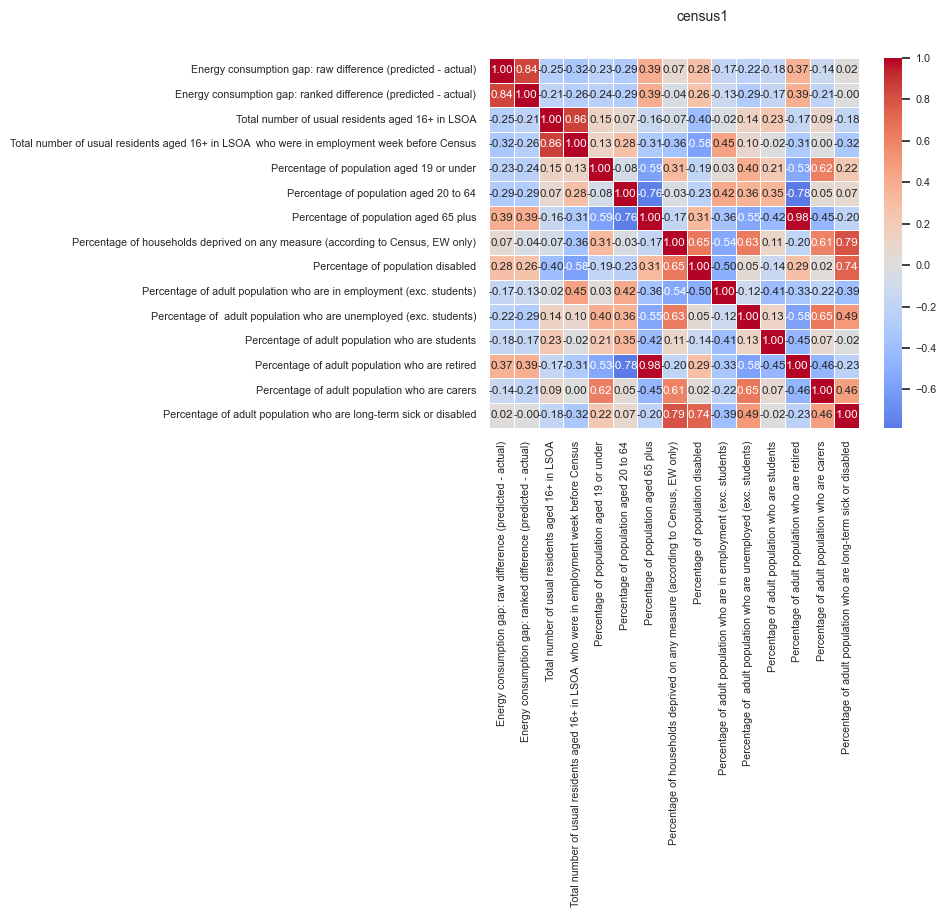

In [376]:
numeric_data = data.loc[:,gap+census[0:13]]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()


# Apply human-readable labels from the dictionary
corr_matrix.rename(index=labels, columns=labels, inplace=True)

# Create the heatmap
sns.set(font_scale=0.7)
ax = sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values
    fmt=".2f",             # Format the annotation
    cmap='coolwarm',       # Color palette (try 'viridis', 'magma', etc.)
    center=0,              # Center the colormap at 0
    linewidths=0.5,        # Lines between boxes
    square=True            # Make cells square
)

ax.figure.suptitle('census1')

Text(0.5, 0.98, 'census2')

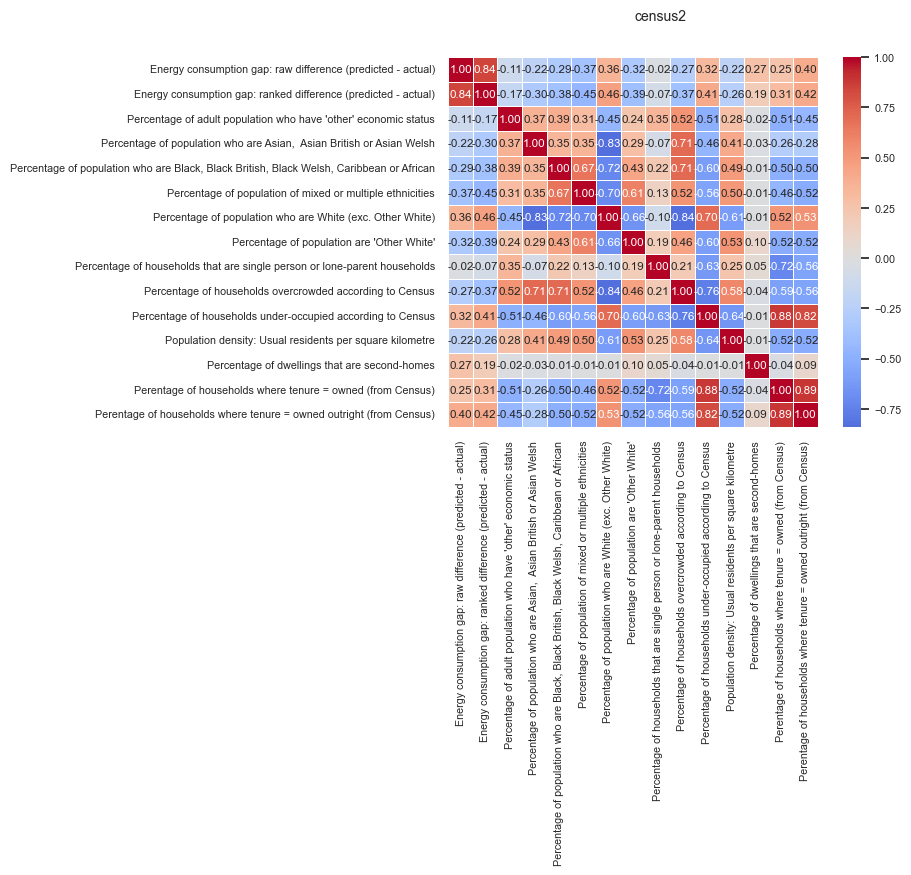

In [377]:
numeric_data = data.loc[:,gap+census[13:26]]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Apply human-readable labels from the dictionary
corr_matrix.rename(index=labels, columns=labels, inplace=True)

# Create the heatmap
sns.set(font_scale=0.7)
ax = sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values
    fmt=".2f",             # Format the annotation
    cmap='coolwarm',       # Color palette (try 'viridis', 'magma', etc.)
    center=0,              # Center the colormap at 0
    linewidths=0.5,        # Lines between boxes
    square=True            # Make cells square
)

ax.figure.suptitle('census2')

Text(0.5, 0.98, 'census3')

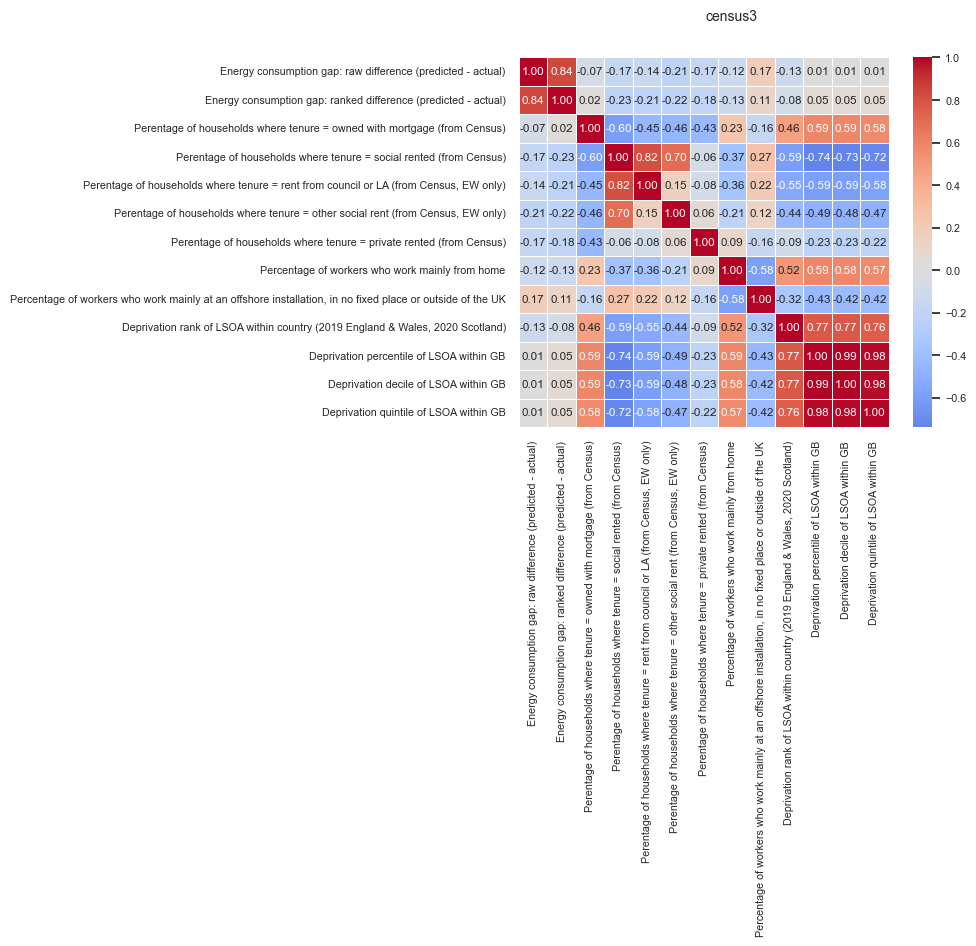

In [378]:
numeric_data = data.loc[:,gap+census[26:38]]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()


# Apply human-readable labels from the dictionary
corr_matrix.rename(index=labels, columns=labels, inplace=True)

# Create the heatmap
sns.set(font_scale=0.7)
ax = sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values
    fmt=".2f",             # Format the annotation
    cmap='coolwarm',       # Color palette (try 'viridis', 'magma', etc.)
    center=0,              # Center the colormap at 0
    linewidths=0.5,        # Lines between boxes
    square=True            # Make cells square
)

ax.figure.suptitle('census3')

In [30]:
heat_loss = [ 
 'E_MULTI_GLAZE_PROP_mean',
 'E_EXTENSION_COUNT_mean',
 'E_ROOF_INSULATION_prop',
 'E_OpenFire_mean','E_AGE_mean']

other_fuel = [
 
 'E_HEAT_MAIN_SOLIDFUEL_prop',
 'E_HEAT_MAIN_OTHER_prop',
 'E_HEAT_MAIN_HEATPUMP_prop',
 'E_HEAT_2ND_SOLIDFUEL_prop',
 'E_HEAT_2ND_OTHER_prop',
 'E_HEAT_2ND_HEATPUMP_prop',
 'E_SOLID_FUEL_HIGH','E_OpenFire_mean',
 'E_OpenFire_prop']


stay_home = [
 'C_AGE_65PLUS_prop',
 'C_DISABLED_prop',
 'C_ECON_UNEMP_prop',
 'C_ECON_RETIRED_prop',
 'C_WORKFROMHOME']

away = [
 'C_EMPLOYED_tot',
 'C_AGE_20_64_prop',
 'C_ECON_EMPLOYED_prop',
 'C_SECONDHOMES',
 'C_WORKOFFSHORE']

In [15]:
scot = data[data['COUNTRY'] == 'Scotland']
eng = data[data['COUNTRY'] == 'England and Wales']

In [1]:
data['COUNTRY'].unique()

NameError: name 'data' is not defined

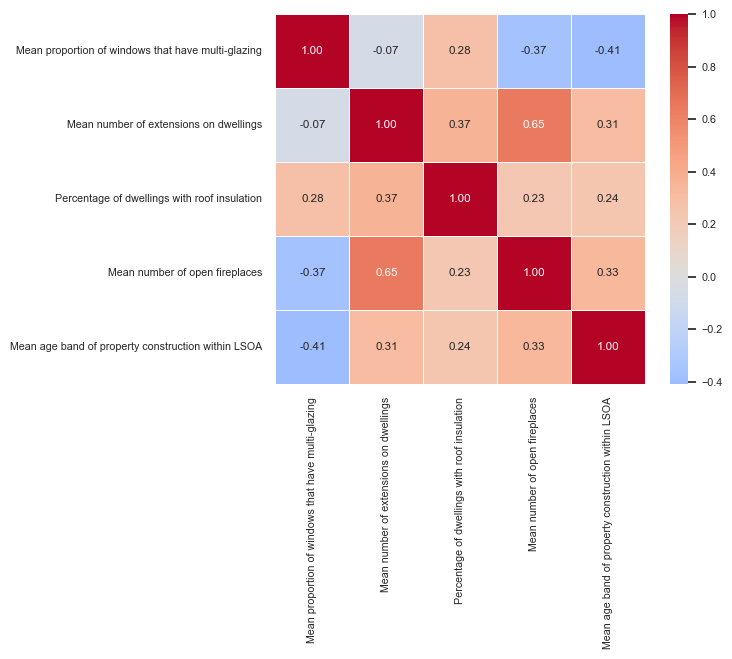

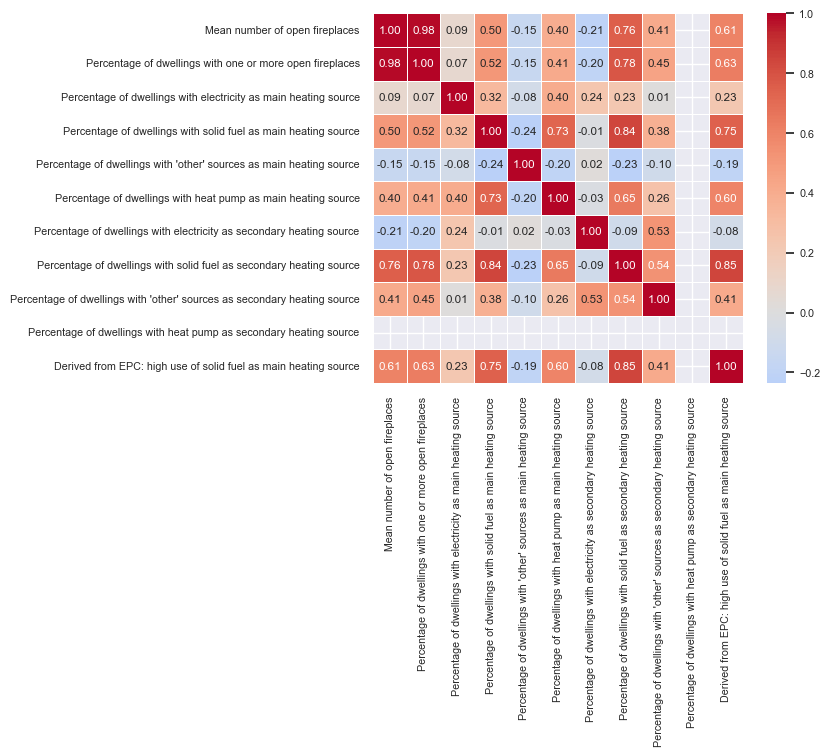

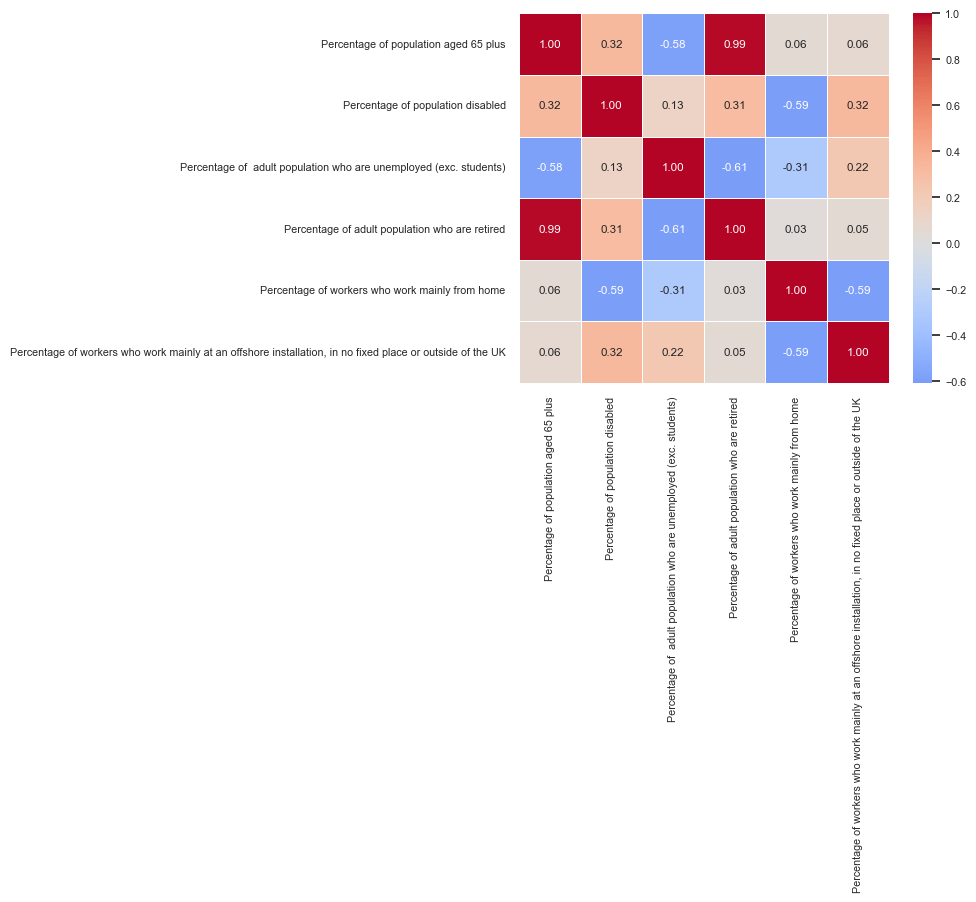

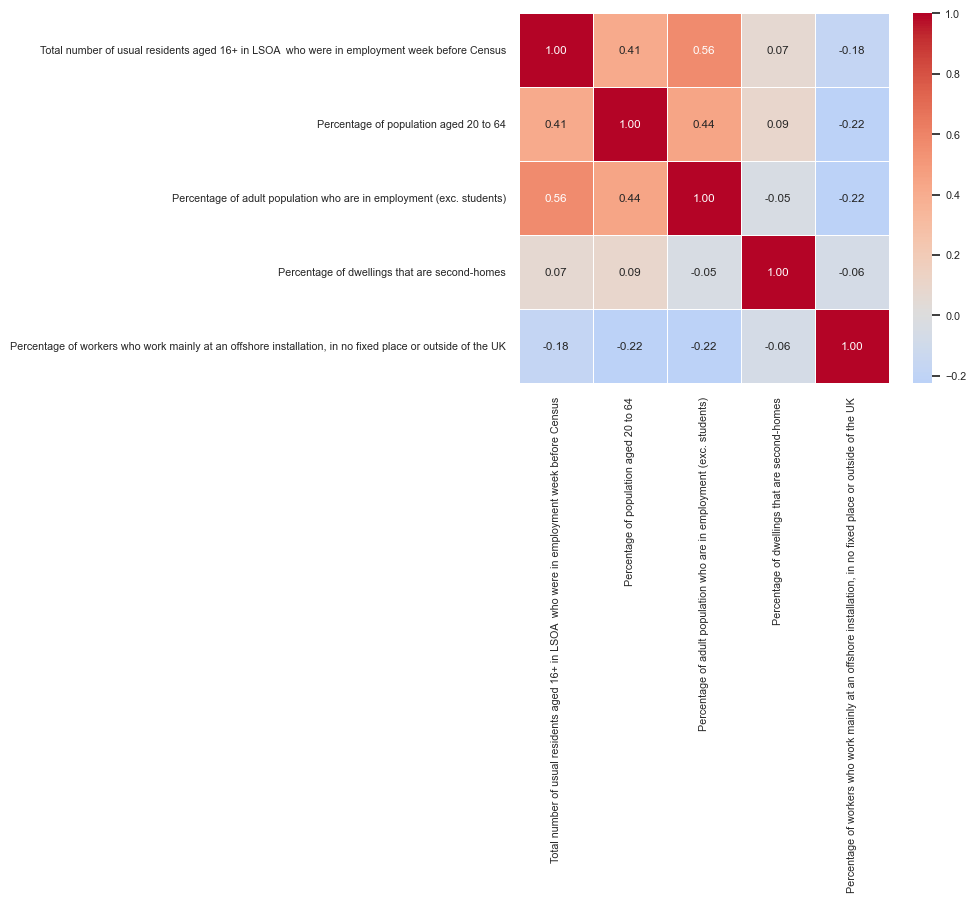

In [54]:
li_da = [heat_loss,other_fuel,stay_home,away]

for i in li_da:
    numeric_data = eng.loc[:,eng.columns.isin(i)]
    corr_matrix = numeric_data.corr()
    corr_matrix.rename(index=labels, columns=labels, inplace=True)
    
    sns.set(font_scale=0.7)
    ax = sns.heatmap(
        corr_matrix,
        annot=True,            # Show correlation values
        fmt=".2f",             # Format the annotation
        cmap='coolwarm',       # Color palette (try 'viridis', 'magma', etc.)
        center=0,              # Center the colormap at 0
        linewidths=0.5,        # Lines between boxes
        square=True            # Make cells square
        )
    #ax.figure.suptitle(i)
    plt.show();

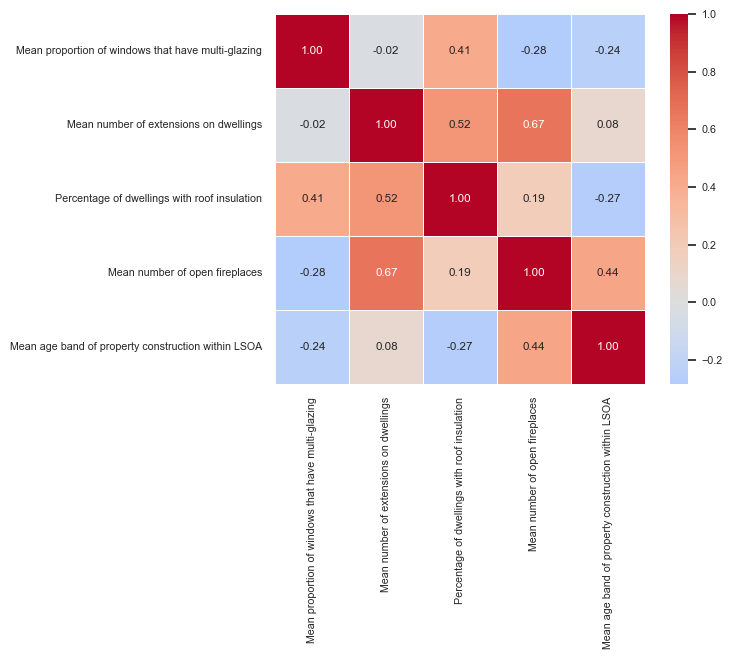

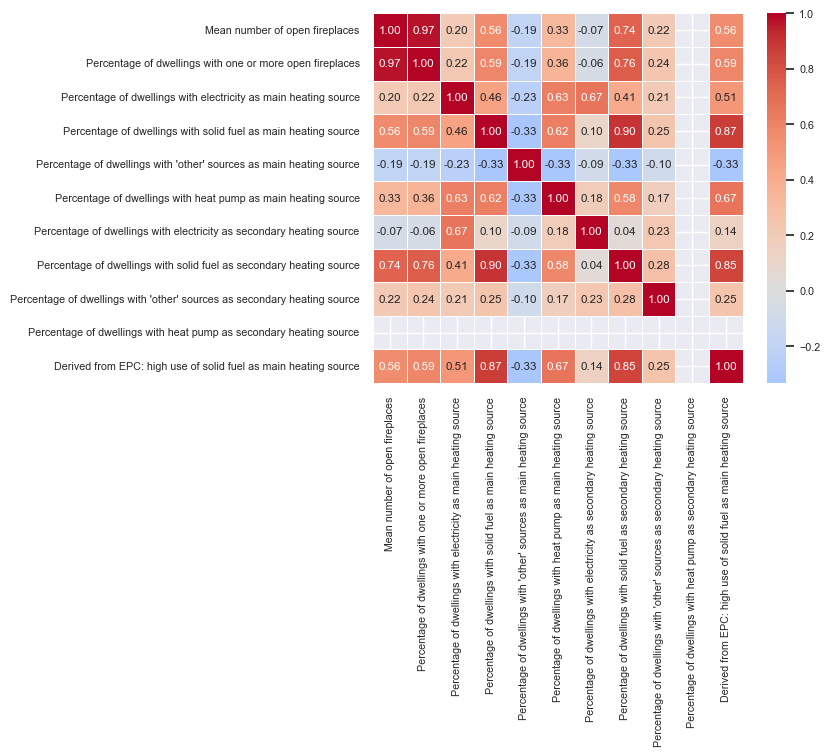

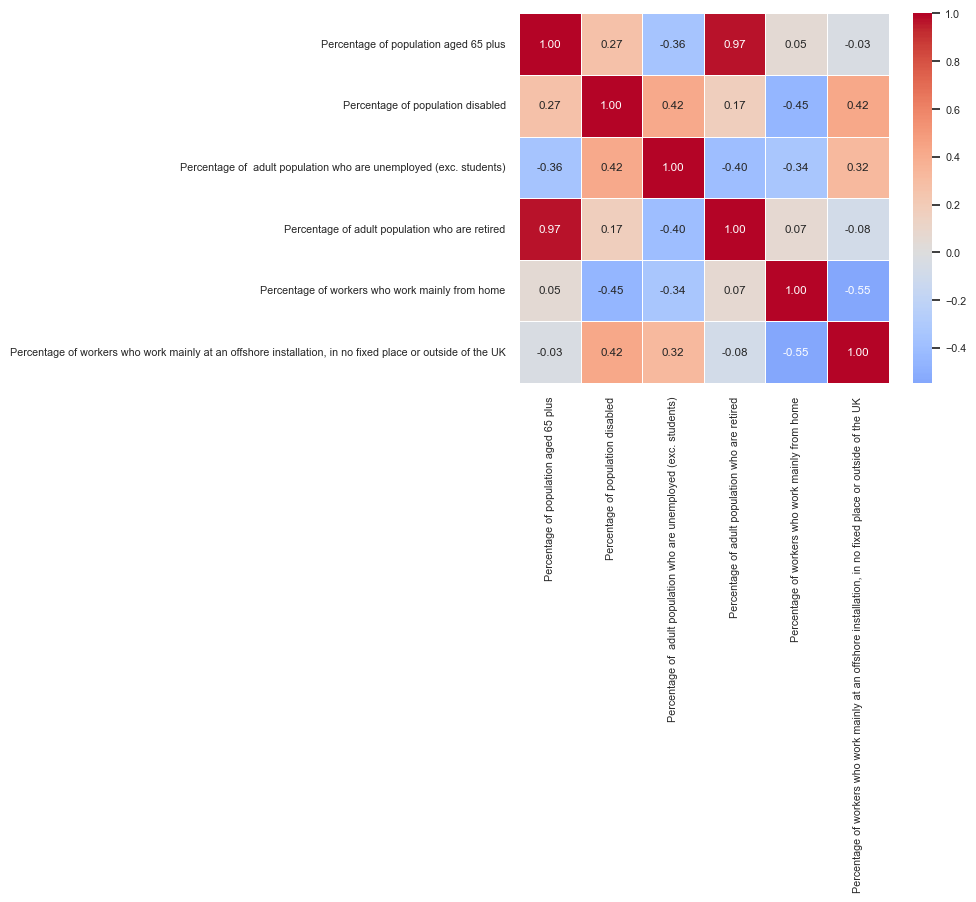

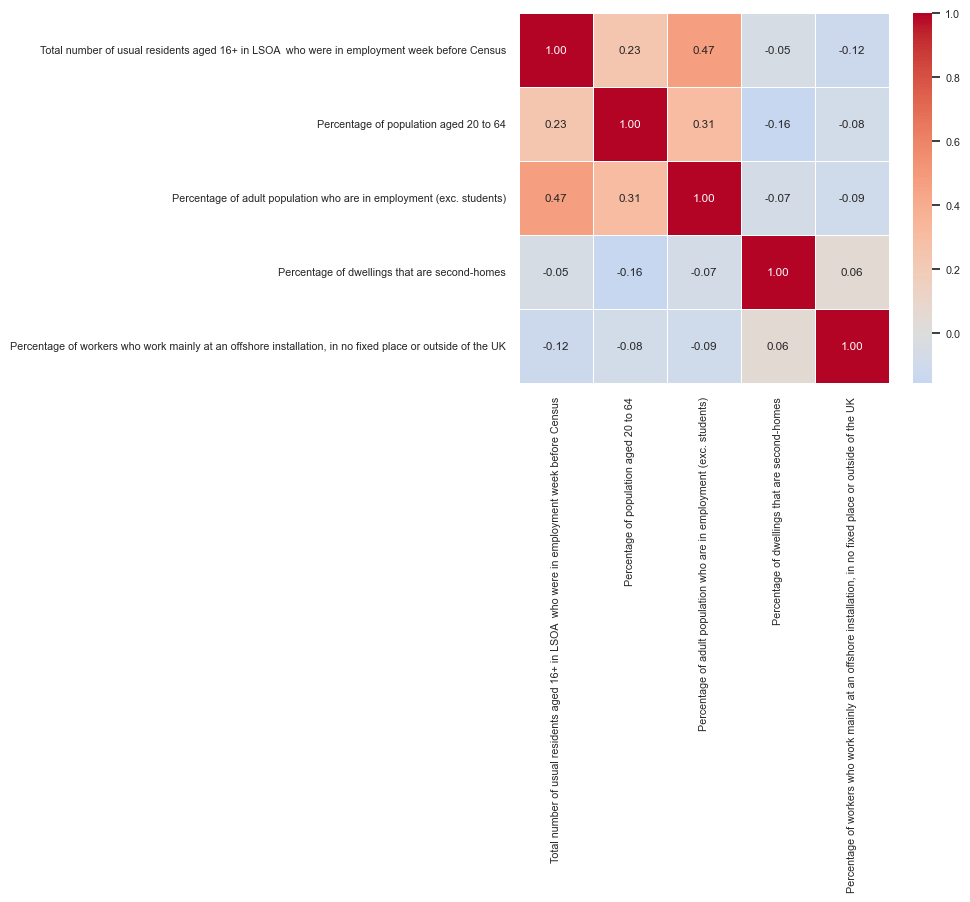

In [55]:
li_da = [heat_loss,other_fuel,stay_home,away]

for i in li_da:
    numeric_data = scot.loc[:,scot.columns.isin(i)]
    corr_matrix = numeric_data.corr()
    corr_matrix.rename(index=labels, columns=labels, inplace=True)
    
    sns.set(font_scale=0.7)
    ax = sns.heatmap(
        corr_matrix,
        annot=True,            # Show correlation values
        fmt=".2f",             # Format the annotation
        cmap='coolwarm',       # Color palette (try 'viridis', 'magma', etc.)
        center=0,              # Center the colormap at 0
        linewidths=0.5,        # Lines between boxes
        square=True            # Make cells square
        )
    #ax.figure.suptitle(i)
    plt.show();

# pca

## normalise

In [16]:
data_norm_eng = eng.loc[:,house+census+base1]
data_norm_eng = +data_norm_eng.fillna(0)

data_norm_scot = scot.loc[:,house+census+base1]
data_norm_scot = data_norm_scot.fillna(0)
#data_norm.drop(columns=away+stay_home+other_fuel+heat_loss)


In [57]:
def replace_0(data,var):
    data[var] = np.where(data[var] == 0, 0.001, data[var])

list_replace = data_norm_eng.columns
for i in list_replace:
    replace_0(data_norm_eng, i)

list_replace = data_norm_scot.columns
for i in list_replace:
    replace_0(data_norm_scot, i)

In [58]:
li_right = [] # log
for col in data_norm_eng.select_dtypes(include=[np.number]).columns:
    skew = data_norm_eng[col].skew()
    if skew > 1:
        li_right.append(col)

li_left = [] # exp
for col in data_norm_eng.select_dtypes(include=[np.number]).columns:
    skew = data_norm_eng[col].skew()
    if skew < -1:
        li_left.append(col)

for i in list(li_right):
    data_norm_eng[i] = np.log(data_norm_eng[i])

for i in list(li_left):
    data_norm_eng[i] = np.exp(data_norm_eng[i])
    
for col in data_norm_eng.select_dtypes(include=[np.number]).columns:
    skew = data_norm_eng[col].skew()
    if abs(skew) > 1:
        print(f"{col}: skew = {skew:.2f}")


E_MULTI_GLAZE_PROP_med: skew = -8.14
E_MULTI_GLAZE_PROP_mean: skew = 2.02
E_PHOTO_SUPPLY_prop: skew = -1.13
E_PHOTO_SUPPLY_mean: skew = -1.08
E_ROOF_INSULATION_prop: skew = 4.69
E_THATCHED_prop: skew = 2.95
E_OpenFire_mean: skew = -1.35
E_OpenFire_prop: skew = -3.17
E_HEAT_MAIN_ELECTRIC_prop: skew = -2.37
E_HEAT_MAIN_OTHER_prop: skew = -11.21
E_HEAT_MAIN_ELECTRIC_OTHER_prop: skew = -2.37
E_HEAT_MAIN_ELECTRIC_SOLID_prop: skew = 3.79
E_HEAT_MAIN_HEATPUMP_prop: skew = 1.13
E_HEAT_2ND_ELECTRIC_prop: skew = -3.45
E_HEAT_2ND_SOLIDFUEL_prop: skew = -2.14
E_HEAT_2ND_ELECTRIC_OTHER_prop: skew = -3.45
E_HEAT_2ND_SOLID_OTHER_prop: skew = -2.14
E_MAINS_GAS_prop: skew = 4.20
E_SOLID_FUEL_HIGH: skew = 2.16
E_TENURE_PRIVRENT_prop: skew = -2.07
E_TENURE_SOCRENT_prop: skew = -2.46
E_TYPE_BUNGALOW_prop: skew = -1.63
E_TYPE_FLAT_prop: skew = -2.53
E_TYPE_HOUSE_prop: skew = 13.66
E_TYPE_PARKHOME_prop: skew = 5.26
E_AGE_1976_2002_prop: skew = -3.02
E_AGE_1930_1949_prop: skew = -2.54
E_AGE_pre1929_prop: ske

li_right = [] # log
for col in data_norm_scot.select_dtypes(include=[np.number]).columns:
    skew = data_norm_scot[col].skew()
    if skew > 1:
        li_right.append(col)

li_left = [] # exp
for col in data_norm_scot.select_dtypes(include=[np.number]).columns:
    skew = data_norm_scot[col].skew()
    if skew < -1:
        li_left.append(col)

for i in list(li_right):
    data_norm_scot[i] = np.log(data_norm_scot[i])

for i in list(li_left):
    data_norm_scot[i] = np.exp(data_norm_scot[i])
    
for col in data_norm_scot.select_dtypes(include=[np.number]).columns:
    skew = data_norm_scot[col].skew()
    if abs(skew) > 1:
        print(f"{col}: skew = {skew:.2f}")

## standardise

In [17]:
li_col = heat_loss + other_fuel + stay_home +away

In [18]:
def zscore_and_rescale(df, columns, lower=-100, upper=100):
    """
    Standardize variables using z-score, then rescale to [lower, upper].

    Parameters:
    - df: pandas DataFrame
    - columns: list of column names to process
    - lower, upper: target range

    Returns:
    - DataFrame with new columns named <col>_std
    """
    df_scaled = df.copy()

    for col in columns:
        mean = df[col].mean()
        std = df[col].std()

        if std == 0:
            df_scaled[col + '_std'] = 0
        else:
            z = (df[col] - mean) / std
            z_min = z.min()
            z_max = z.max()

            # Rescale z-score to [lower, upper]
            if z_min == z_max:
                df_scaled[col + '_std'] = 0
            else:
                rescaled = ((z - z_min) / (z_max - z_min)) * (upper - lower) + lower
                df_scaled[col + '_std'] = rescaled

    return df_scaled

In [19]:
data_scaled_eng = zscore_and_rescale(data_norm_eng, li_col, lower=-100, upper=100)
data_scaled_scot = zscore_and_rescale(data_norm_scot, li_col, lower=-100, upper=100)
# Check result
data_scaled_eng


E_MULTI_GLAZE_PROP_med  E_MULTI_GLAZE_PROP_mean  \
0                       100.0                    86.09   
1                       100.0                    81.47   
2                       100.0                    70.23   
3                       100.0                    95.10   
4                       100.0                    95.26   
...                       ...                      ...   
43407                   100.0                    99.01   
43408                   100.0                    99.78   
43409                   100.0                    98.32   
43410                   100.0                   100.00   
43411                   100.0                    99.91   

       E_EXTENSION_COUNT_mean  E_PHOTO_SUPPLY_prop  E_PHOTO_SUPPLY_mean  \
0                        0.04              0.00000                 0.00   
1                        0.06              0.00000                 0.00   
2                        0.17              0.00000                 0.00   
3                        0.10              0.00000                 0.00   
4                        0.47              0.00000                 0.00   
...                       ...                  ...                  ...   
43407                    0.19              0.00000                 0.00   
43408                    0.28              0.00000                 0.00   
43409                    0.42              1.15942                 0.89   
43410                    0.42              0.20202                 0.31   
43411                    0.57              0.00000                 0.00   

       E_ROOF_INSULATION_prop  E_THATCHED_prop  E_OpenFire_mean  \
0                   12.427746          0.00000             0.00   
1                    7.158837          0.00000             0.00   
2                   12.343750          0.00000             0.00   
3                   11.764706          0.00000             0.00   
4                   77.994429          0.00000             0.05   
...                       ...              ...              ...   
43407               29.768271          0.00000             0.01   
43408               73.827160          0.00000             0.03   
43409               80.579710          1.15942             0.06   
43410               34.545455          0.00000             0.03   
43411                1.498127          0.00000             0.00   

       E_OpenFire_prop  E_HEAT_MAIN_ELECTRIC_prop  ...  C_AGE_65PLUS_prop_std  \
0             0.000000                  45.664740  ...             -23.487945   
1             0.223714                  16.778523  ...             -39.081541   
2             0.156250                  17.500000  ...             -46.246982   
3             0.000000                  21.483376  ...             -71.367858   
4             4.178273                  28.690808  ...             -74.020556   
...                ...                        ...  ...                    ...   
43407         0.356506                  12.834225  ...             -52.423515   
43408         3.209877                  15.555556  ...             -43.408341   
43409         5.507246                   8.115942  ...             -28.499742   
43410         3.030303                   0.202020  ...             -68.094832   
43411         0.000000                   2.340824  ...             -89.067361   

       C_DISABLED_prop_std  C_ECON_UNEMP_prop_std  C_ECON_RETIRED_prop_std  \
0               -60.376141             -69.632711               -35.574836   
1               -58.936157             -70.368206               -48.795474   
2               -44.780857             -42.226183               -54.075849   
3               -28.218604             -19.870690               -71.521794   
4               -55.913796             -48.824978               -76.686143   
...                    ...                    ...                      ...   
43407           -33.504514             -59.778229               -44.058665   
43408  

In [62]:
data_pca_eng = data_scaled_eng.loc[:,data_scaled_eng.columns.isin(li_col)]
data_pca_scot = data_scaled_scot.loc[:,data_scaled_scot.columns.isin(li_col)]

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [21]:

def apply_pca(df, columns, n_components=1):

    pca = PCA(n_components=n_components)
    components = pca.fit_transform(df)

    # Add the first principal component as a new column
    var1 = components[:, 0]

    return var1


In [22]:
data_scaled_eng['heat_loss'] = apply_pca(data_scaled_eng.loc[:,heat_loss], columns=list(heat_loss), n_components=1)
data_scaled_eng['away'] = apply_pca(data_scaled_eng.loc[:,away], columns=list(away), n_components=1)
data_scaled_eng['other_fuel'] = apply_pca(data_scaled_eng.loc[:,other_fuel], columns=list(other_fuel), n_components=1)
data_scaled_eng['stay_home'] = apply_pca(data_scaled_eng.loc[:,stay_home], columns=list(stay_home), n_components=1)

data_scaled_scot['heat_loss'] = apply_pca(data_scaled_scot.loc[:,heat_loss], columns=list(heat_loss), n_components=1)
data_scaled_scot['away'] = apply_pca(data_scaled_scot.loc[:,away], columns=list(away), n_components=1)
data_scaled_scot['other_fuel'] = apply_pca(data_scaled_scot.loc[:,other_fuel], columns=list(other_fuel), n_components=1)
data_scaled_scot['stay_home'] = apply_pca(data_scaled_scot.loc[:,stay_home], columns=list(stay_home), n_components=1)

In [133]:
pd.DataFrame(data.columns).to_csv('./../../Volumes/Extreme_SSD/WORK/EPC/gas_consumption/test_info.csv')

# Find most related variables

In [31]:
extra = ['heat_loss','other_fuel', 'stay_home', 'away']

In [67]:
gap

['D_GAP_raw', 'D_GAP_rank', 'D_GAP_normalised']

In [35]:
numeric_data_eng = data_scaled_eng.loc[:,base1+house+census+extra]
numeric_data_eng['D_GAP_normalised'] = eng['D_GAP_normalised'].copy()
data_scaled_eng['D_GAP_normalised'] = eng['D_GAP_normalised'].copy()
# Compute the correlation matrix
corr_matrix_eng = numeric_data_eng.corr()
corr_matrix_eng


numeric_data_scot = data_scaled_scot.loc[:,base1+house+census+extra]
numeric_data_scot['D_GAP_normalised'] = scot['D_GAP_normalised'].copy()
data_scaled_scot['D_GAP_normalised'] = scot['D_GAP_normalised'].copy()
# Compute the correlation matrix
corr_matrix_scot = numeric_data_scot.corr()
corr_matrix_scot

A_GasMeter_num  A_Gas_Consump_tot  A_Gas_Consump_mean  \
A_GasMeter_num            1.000000           0.845494            0.288589   
A_Gas_Consump_tot         0.845494           1.000000            0.616976   
A_Gas_Consump_mean        0.288589           0.616976            1.000000   
A_GasNonMeter_num         0.352946           0.127941           -0.117168   
A_ElecMeter_num           0.541023           0.358242           -0.243482   
...                            ...                ...                 ...   
heat_loss                -0.367651          -0.141298            0.129947   
other_fuel               -0.587812          -0.483389           -0.358945   
stay_home                -0.217113           0.023869            0.175222   
away                      0.595030           0.500735           -0.033548   
D_GAP_normalised         -0.585060          -0.544464           -0.599201   

                    A_GasNonMeter_num  A_ElecMeter_num  C_DomProp_num  \
A_GasMeter_num               0.352946         0.541023       0.611256   
A_Gas_Consump_tot            0.127941         0.358242       0.413424   
A_Gas_Consump_mean          -0.117168        -0.243482      -0.171784   
A_GasNonMeter_num            1.000000         0.295576       0.344404   
A_ElecMeter_num              0.295576         1.000000       0.923404   
...                               ...              ...            ...   
heat_loss                   -0.427575        -0.466756      -0.478035   
other_fuel                  -0.230628         0.048448      -0.017497   
stay_home                   -0.224218        -0.147613      -0.197875   
away                         0.060573         0.753820       0.750081   
D_GAP_normalised            -0.139351         0.076212      -0.043158   

                    C_DomGasMeter_num  C_OffGrid_num  C_OffGrid_prop  \
A_GasMeter_num               0.999557      -0.085005       -0.222046   
A_Gas_Consump_tot            0.839699      -0.141401       -0.238307   
A_Gas_Consump_mean           0.281496       0.096589        0.183497   
A_GasNonMeter_num            0.380629       0.076005       -0.008096   
A_ElecMeter_num              0.544110       0.288424        0.127829   
...                               ...            ...             ...   
heat_loss                   -0.376959      -0.307002       -0.224645   
other_fuel                  -0.588288       0.147640        0.241008   
stay_home                   -0.221711      -0.111300       -0.040412   
away                         0.590015       0.127714        0.012150   
D_GAP_normalised            -0.582666      -0.073020       -0.055376   

                    E_FloorArea_mean  ...  C_WORKOFFSHORE  C_DEP_rank  \
A_GasMeter_num             -0.322976  ...       -0.130344   -0.084697   
A_Gas_Consump_tot           0.049127  ...       -0.264318    0.246207   
A_Gas_Consump_mean          0.285110  ...       -0.301627    0.388608   
A_GasNonMeter_num          -0.372133  ...        0.082098   -0.407451   
A_ElecMeter_num            -0.121687  ...       -0.015812   -0.093033   
...                              ...  ...             ...         ...   
heat_loss                   0.314906  ...        0.127887    0.216880   
other_fuel                  0.630892  ...        0.066707    0.204138   
stay_home                   0.279334  ...       -0.024969    0.238070   
away                        0.095941  ...       -0.120546    0.168473   
D_GAP_normalised            0.305309  ...        0.137621    0.047179   

                    C_DEP_percentile  C_DEP_decile  C_DEP_quintile  heat_loss  \
A_GasMeter_num             -0.084643     -0.084798       -0.086611  -0.367651   
A_Gas_Consump_tot           0.246213      0.243718        0.235550  -0.141298   
A_Gas_Consump_mean          0.388653      0.386102        0.375547   0.129947   
A_GasNonMeter_num          -0.407370     -0.403410       -0.396645  -0.427575   
A_ElecMeter_num            -0.093031     -0.093243       -0.092077  -0.

In [123]:
numeric_data_eng

A_GasMeter_num  A_Gas_Consump_tot  A_Gas_Consump_mean  \
0                54.0       5.427412e+05        10050.763673   
1                16.0       4.177373e+05        26108.583697   
2               545.0       3.685674e+06         6762.705232   
3               394.0       2.628638e+06         6671.670332   
4               403.0       5.857459e+06        14534.638023   
...               ...                ...                 ...   
43407           704.0       5.056894e+06         7183.087986   
43408           541.0       4.862706e+06         8988.365173   
43409           586.0       5.775592e+06         9855.959031   
43410           748.0       6.929357e+06         9263.846230   
43411          1099.0       5.114587e+06         4653.855629   

       A_GasNonMeter_num  A_ElecMeter_num  C_DomProp_num  C_DomGasMeter_num  \
0              -6.907755         6.961296       6.956545               54.0   
1              -6.907755         7.060476       7.056175               16.0   
2               2.833213         7.147559       7.081709              562.0   
3               3.555348         6.363028       6.633318              429.0   
4               1.791759         6.269096       6.272877              409.0   
...                  ...              ...            ...                ...   
43407          -6.907755         6.752270       6.733402              704.0   
43408           2.564949         6.455199       6.445720              554.0   
43409           1.609438         6.458338       6.476972              591.0   
43410          -6.907755         6.617403       6.620073              748.0   
43411          -6.907755         7.009409       7.047517             1099.0   

       C_OffGrid_num  C_OffGrid_prop  E_FloorArea_mean  ...  C_WORKOFFSHORE  \
0           6.903747       -0.052768          4.206780  ...             3.8   
1           7.042286       -0.013896          4.215382  ...             5.1   
2           6.442540       -0.639227          4.036186  ...             6.7   
3           5.802118       -0.831260          4.035125  ...             8.8   
4           4.795791       -1.477095          4.444532  ...            23.3   
...              ...             ...               ...  ...             ...   
43407       4.912655       -1.820776          4.393461  ...             9.2   
43408       4.330733       -2.115276          4.374876  ...            11.1   
43409       4.077537       -2.399096          4.520375  ...            17.6   
43410       0.693147       -5.914504          4.639668  ...            11.6   
43411       3.931826       -3.116771          4.359909  ...            10.9   

       C_DEP_rank  C_DEP_percentile  C_DEP_decile  C_DEP_quintile  \
0       29199.000            89.000         9.000           5.000   
1       30379.000            92.000        10.000           5.000   
2       14915.000            45.000         5.000           3.000   
3        8678.000            26.000         3.000           2.000   
4       14486.000            44.000         5.000           3.000   
...           ...               ...           ...             ...   
43407       0.001             0.001         0.001           0.001   
43408    1571.000            82.000         9.000           5.000   
43409       0.001             0.001         0.001           0.001   
43410    1493.000            78.000         8.000           4.000   
43411       0.001             0.001         0.001           0.001   

          heat_loss    other_fuel  stay_home       away  D_GAP_normalised  
0     -4.004120e+42  8.242984e+40  45.620117  11.784137         -0.706304  
1     -4.004143e+42  8.242984e+40  47.211011  18.284693         -9.463142  
2     -4.004144e+42  8.242984e+40  31.615275  18.298801         -0.667606  
3     -3.807548e+42  8.242984e+40   9.117292   2.239189         -1.420157  
4     -3.773436e+42  8.242984e+40 -10.575893   4.477194         -1.314260  
...             ...           ...        ...        ...

In [99]:
data_scaled_scot

E_MULTI_GLAZE_PROP_med  E_MULTI_GLAZE_PROP_mean  \
34391                 100.000                    97.63   
34392                 100.000                    96.24   
34393                 100.000                    99.43   
34394                 100.000                    97.84   
34395                 100.000                    97.21   
...                       ...                      ...   
41448                 100.000                    95.38   
41449                 100.000                    92.33   
41450                 100.000                    90.07   
41451                 100.000                    99.14   
41452                   0.001                    44.10   

       E_EXTENSION_COUNT_mean  E_PHOTO_SUPPLY_prop  E_PHOTO_SUPPLY_mean  \
34391                    0.31             0.892857                0.001   
34392                    0.26             3.636364                0.001   
34393                    0.26             0.001000                0.001   
34394                    0.15             2.877698                0.001   
34395                    0.38             1.470588                0.001   
...                       ...                  ...                  ...   
41448                    0.33             2.173913                0.001   
41449                    0.33             4.666667                0.001   
41450                    0.16             9.734513                0.001   
41451                    0.09             0.862069                0.001   
41452                    0.25            57.307692                0.001   

       E_ROOF_INSULATION_prop  E_THATCHED_prop  E_OpenFire_mean  \
34391               58.928571            0.001             0.11   
34392               90.000000            0.001             0.05   
34393               52.272727            0.001             0.06   
34394               79.136691            0.001             0.06   
34395               71.323529            0.001             0.13   
...                       ...              ...              ...   
41448               71.014493            0.001             0.06   
41449               78.666667            0.001             0.03   
41450               68.141593            0.001             0.02   
41451               99.137931            0.001             0.03   
41452               43.076923            0.001             0.05   

       E_OpenFire_prop  E_HEAT_MAIN_ELECTRIC_prop  ...  C_SECONDHOMES_std  \
34391         9.821429                  21.428571  ...         -96.157618   
34392         5.454545                   7.272727  ...        -100.000000   
34393         5.681818                  15.909091  ...         -92.311391   
34394         5.755396                  13.669065  ...        -100.000000   
34395        11.764706                   2.941176  ...         -96.157618   
...                ...                        ...  ...                ...   
41448         5.797101                   5.072464  ...        -100.000000   
41449         2.666667                   0.666667  ...        -100.000000   
41450         2.212389                   6.194690  ...        -100.000000   
41451         3.448276                   3.448276  ...        -100.000000   
41452         2.692308                   2.692308  ...        -100.000000   

       heat_loss        away  other_fuel  stay_home  D_GAP_normalised  \
34391 -12.163617  103.112352    2.464745   0.052108          0.057903   
34392  16.775439  -42.051031  -11.410087  15.332767          0.257132   
34393 -17.870394  -59.495236   -5.239250 -10.813303         -0.561948   
34394   7.018854 -110.863839   -6.857502   2.230292          0.468789   
34395  -0.579778  -86.945245  -10.285100   5.610626         -0.166431   
...          ...         ...         ...        ...               ...   
41448  -1.466716 -117.984825  -12.631095  11.635514          0.326914   
41449   4.786443   60.377545  -16.627456  -9.980156         -0.420712   
41450  -5.904532  -61.

In [75]:
vars_rak_eng = corr_matrix_eng.loc[:,['D_GAP_normalised']].reset_index()
vars_rak_eng

vars_rak_scot = corr_matrix_scot.loc[:,['D_GAP_normalised']].reset_index()
vars_rak_scot

index  D_GAP_normalised
0        A_GasMeter_num         -0.585059
1     A_Gas_Consump_tot         -0.544464
2    A_Gas_Consump_mean         -0.599201
3     A_GasNonMeter_num         -0.139346
4       A_ElecMeter_num          0.076212
..                  ...               ...
103           heat_loss          0.265960
104          other_fuel          0.799539
105           stay_home          0.273305
106                away         -0.122192
107    D_GAP_normalised          1.000000

[108 rows x 2 columns]

In [71]:
vars_rak_scot = round(corr_matrix_scot.reset_index(),2)
vars_rak_scot.to_csv('./../../Volumes/Extreme_SSD/WORK/EPC/gas_consumption/scotland_correlations.csv')


vars_rak_eng = round(corr_matrix_eng.reset_index(),2)
vars_rak_eng.to_csv('./../../Volumes/Extreme_SSD/WORK/EPC/gas_consumption/england_correlations.csv')

In [77]:
#vars_raw = corr_matrix.iloc[:,[0]].reset_index()
#vars_raw = vars_raw[(vars_raw['D_GAP_raw'] > 0.3) | (vars_raw['D_GAP_raw'] < -0.3)]

vars_rak_eng = corr_matrix_eng.loc[:,['D_GAP_normalised']].reset_index()
vars_rak_eng = vars_rak_eng[(vars_rak_eng['D_GAP_normalised'] > 0.3) | (vars_rak_eng['D_GAP_normalised'] < -0.3)]
vars_rak_eng['D_GAP_normalised'] = np.abs(vars_rak_eng['D_GAP_normalised'])
vars_rak_eng = vars_rak_eng.sort_values(by='D_GAP_normalised', ascending=False).reset_index()
vars_rak_eng 


vars_rak_scot = corr_matrix_scot.loc[:,['D_GAP_normalised']].reset_index()
vars_rak_scot = vars_rak_scot[(vars_rak_scot['D_GAP_normalised'] > 0.3) | (vars_rak_scot['D_GAP_normalised'] < -0.3)]
vars_rak_scot['D_GAP_normalised'] = np.abs(vars_rak_scot['D_GAP_normalised'])
vars_rak_scot = vars_rak_scot.sort_values(by='D_GAP_normalised', ascending=False).reset_index()
vars_rak_scot 

level_0                            index  D_GAP_normalised
0       107                 D_GAP_normalised          1.000000
1        57                E_EFFICIENCY_mean          0.823099
2        58           E_EFFICIENCY_BAND_mean          0.804695
3       104                       other_fuel          0.799539
4        13           D_Gas_Elec_Meter_ratio          0.752419
5        24       E_HEAT_MAIN_SOLIDFUEL_prop          0.710943
6        28     E_HEAT_MAIN_SOLID_OTHER_prop          0.710266
7        35      E_HEAT_2ND_SOLID_OTHER_prop          0.700759
8        31        E_HEAT_2ND_SOLIDFUEL_prop          0.700759
9        38                E_SOLID_FUEL_HIGH          0.688555
10       23        E_HEAT_MAIN_ELECTRIC_prop          0.609531
11       26  E_HEAT_MAIN_ELECTRIC_OTHER_prop          0.607867
12        2               A_Gas_Consump_mean          0.599201
13        0                   A_GasMeter_num          0.585059
14        6                C_DomGasMeter_num          0.582665
15       29        E_HEAT_MAIN_HEATPUMP_prop          0.572173
16       27  E_HEAT_MAIN_ELECTRIC_SOLID_prop          0.566913
17       22                  E_OpenFire_prop          0.546124
18        1                A_Gas_Consump_tot          0.544464
19       89                    C_SECONDHOMES          0.515995
20       21                  E_OpenFire_mean          0.507720
21       16           E_EXTENSION_COUNT_mean          0.501672
22       46             E_TYPE_BUNGALOW_prop          0.492564
23       33   E_HEAT_2ND_ELECTRIC_OTHER_prop          0.363178
24       30         E_HEAT_2ND_ELECTRIC_prop          0.363178
25       91                C_TENURE_OUTRIGHT          0.319893
26       63                       E_CROWDING          0.309656
27       70                C_AGE_65PLUS_prop          0.307858
28       56                       E_AGE_mean          0.307222
29        9                 E_FloorArea_mean          0.305309
30       25           E_HEAT_MAIN_OTHER_prop          0.301615

In [78]:
vars_rak_eng

level_0                            index  D_GAP_normalised
0       107                 D_GAP_normalised          1.000000
1        57                E_EFFICIENCY_mean          0.754075
2        58           E_EFFICIENCY_BAND_mean          0.731645
3        32            E_HEAT_2ND_OTHER_prop          0.611703
4        62        E_TRANS_TYPE_GOVDEAL_prop          0.472972
5        13           D_Gas_Elec_Meter_ratio          0.465509
6        35      E_HEAT_2ND_SOLID_OTHER_prop          0.459222
7        31        E_HEAT_2ND_SOLIDFUEL_prop          0.459222
8        21                  E_OpenFire_mean          0.444659
9        91                C_TENURE_OUTRIGHT          0.440798
10       80              C_ETHNIC_ASIAN_prop          0.428010
11       22                  E_OpenFire_prop          0.424652
12       82              C_ETHNIC_MIXED_prop          0.423140
13       81              C_ETHNIC_BLACK_prop          0.419585
14       70                C_AGE_65PLUS_prop          0.416736
15       76              C_ECON_RETIRED_prop          0.409849
16       87            C_UNDER_OCCUPIED_prop          0.409111
17       38                E_SOLID_FUEL_HIGH          0.407791
18       39              E_TENURE_OWNED_prop          0.407368
19       84           C_ETHNIC_WHITEOTH_prop          0.406480
20       88                     C_POPDENSITY          0.401466
21       61          E_TRANS_TYPE_OTHER_prop          0.398118
22       16           E_EXTENSION_COUNT_mean          0.395780
23       63                       E_CROWDING          0.394443
24       56                       E_AGE_mean          0.388728
25       24       E_HEAT_MAIN_SOLIDFUEL_prop          0.374708
26       28     E_HEAT_MAIN_SOLID_OTHER_prop          0.374707
27       11             D_EPC_vs_Census_prop          0.364791
28        9                 E_FloorArea_mean          0.363226
29       69                 C_AGE_20_64_prop          0.360906
30        2               A_Gas_Consump_mean          0.354152
31       27  E_HEAT_MAIN_ELECTRIC_SOLID_prop          0.342564
32       60         E_TYPE_TOPFLOORFLAT_prop          0.339167
33       33   E_HEAT_2ND_ELECTRIC_OTHER_prop          0.333174
34       30         E_HEAT_2ND_ELECTRIC_prop          0.333174
35       46             E_TYPE_BUNGALOW_prop          0.330029
36       90                   C_TENURE_OWNED          0.324813
37       29        E_HEAT_MAIN_HEATPUMP_prop          0.313036
38       86             C_OVER_OCCUPIED_prop          0.309815
39       75                 C_ECON_STUD_prop          0.300253

In [79]:
vars_corrrelated_eng = list(vars_rak_eng['index'])
vars_corrrelated_eng

vars_corrrelated_scot = list(vars_rak_scot['index'])
vars_corrrelated_scot

['D_GAP_normalised',
 'E_EFFICIENCY_mean',
 'E_EFFICIENCY_BAND_mean',
 'other_fuel',
 'D_Gas_Elec_Meter_ratio',
 'E_HEAT_MAIN_SOLIDFUEL_prop',
 'E_HEAT_MAIN_SOLID_OTHER_prop',
 'E_HEAT_2ND_SOLID_OTHER_prop',
 'E_HEAT_2ND_SOLIDFUEL_prop',
 'E_SOLID_FUEL_HIGH',
 'E_HEAT_MAIN_ELECTRIC_prop',
 'E_HEAT_MAIN_ELECTRIC_OTHER_prop',
 'A_Gas_Consump_mean',
 'A_GasMeter_num',
 'C_DomGasMeter_num',
 'E_HEAT_MAIN_HEATPUMP_prop',
 'E_HEAT_MAIN_ELECTRIC_SOLID_prop',
 'E_OpenFire_prop',
 'A_Gas_Consump_tot',
 'C_SECONDHOMES',
 'E_OpenFire_mean',
 'E_EXTENSION_COUNT_mean',
 'E_TYPE_BUNGALOW_prop',
 'E_HEAT_2ND_ELECTRIC_OTHER_prop',
 'E_HEAT_2ND_ELECTRIC_prop',
 'C_TENURE_OUTRIGHT',
 'E_CROWDING',
 'C_AGE_65PLUS_prop',
 'E_AGE_mean',
 'E_FloorArea_mean',
 'E_HEAT_MAIN_OTHER_prop']

In [80]:
vars_corrrelated_eng

['D_GAP_normalised',
 'E_EFFICIENCY_mean',
 'E_EFFICIENCY_BAND_mean',
 'E_HEAT_2ND_OTHER_prop',
 'E_TRANS_TYPE_GOVDEAL_prop',
 'D_Gas_Elec_Meter_ratio',
 'E_HEAT_2ND_SOLID_OTHER_prop',
 'E_HEAT_2ND_SOLIDFUEL_prop',
 'E_OpenFire_mean',
 'C_TENURE_OUTRIGHT',
 'C_ETHNIC_ASIAN_prop',
 'E_OpenFire_prop',
 'C_ETHNIC_MIXED_prop',
 'C_ETHNIC_BLACK_prop',
 'C_AGE_65PLUS_prop',
 'C_ECON_RETIRED_prop',
 'C_UNDER_OCCUPIED_prop',
 'E_SOLID_FUEL_HIGH',
 'E_TENURE_OWNED_prop',
 'C_ETHNIC_WHITEOTH_prop',
 'C_POPDENSITY',
 'E_TRANS_TYPE_OTHER_prop',
 'E_EXTENSION_COUNT_mean',
 'E_CROWDING',
 'E_AGE_mean',
 'E_HEAT_MAIN_SOLIDFUEL_prop',
 'E_HEAT_MAIN_SOLID_OTHER_prop',
 'D_EPC_vs_Census_prop',
 'E_FloorArea_mean',
 'C_AGE_20_64_prop',
 'A_Gas_Consump_mean',
 'E_HEAT_MAIN_ELECTRIC_SOLID_prop',
 'E_TYPE_TOPFLOORFLAT_prop',
 'E_HEAT_2ND_ELECTRIC_OTHER_prop',
 'E_HEAT_2ND_ELECTRIC_prop',
 'E_TYPE_BUNGALOW_prop',
 'C_TENURE_OWNED',
 'E_HEAT_MAIN_HEATPUMP_prop',
 'C_OVER_OCCUPIED_prop',
 'C_ECON_STUD_prop']

In [93]:
data_scaled_scot['COUNTRY'] = scot['COUNTRY'].copy()
data_scaled_scot['REGION'] = scot['REGION'].copy()
data_scaled_scot['WEATHER_REGION'] = scot['WEATHER_REGION'].copy()
data_scaled_scot['C_RurUrb_bin'] = scot['C_RurUrb_bin'].copy()
cats = ['C_RurUrb_bin','REGION','COUNTRY','WEATHER_REGION']
model_data_scot = data_scaled_scot.loc[:,vars_corrrelated_scot+cats]

data_scaled_eng['COUNTRY'] = eng['COUNTRY'].copy()
data_scaled_eng['REGION'] = eng['REGION'].copy()
data_scaled_eng['WEATHER_REGION'] = eng['WEATHER_REGION'].copy()
data_scaled_eng['C_RurUrb_bin'] = eng['C_RurUrb_bin'].copy()
model_data_eng = data_scaled_eng.loc[:,vars_corrrelated_eng+cats]


In [95]:
model_data_scot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7062 entries, 34391 to 41452
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   D_GAP_normalised                 7062 non-null   float64
 1   E_EFFICIENCY_mean                7062 non-null   float64
 2   E_EFFICIENCY_BAND_mean           7062 non-null   float64
 3   other_fuel                       7062 non-null   float64
 4   D_Gas_Elec_Meter_ratio           7062 non-null   float64
 5   E_HEAT_MAIN_SOLIDFUEL_prop       7062 non-null   float64
 6   E_HEAT_MAIN_SOLID_OTHER_prop     7062 non-null   float64
 7   E_HEAT_2ND_SOLID_OTHER_prop      7062 non-null   float64
 8   E_HEAT_2ND_SOLIDFUEL_prop        7062 non-null   float64
 9   E_SOLID_FUEL_HIGH                7062 non-null   float64
 10  E_HEAT_MAIN_ELECTRIC_prop        7062 non-null   float64
 11  E_HEAT_MAIN_ELECTRIC_OTHER_prop  7062 non-null   float64
 12  A_Gas_Consump_mean  

def replace_0(data,var):
    data[var] = np.where(data[var] == 0, 0.001, data[var])
list_replace = vars_test.iloc[:,0:36].columns
for i in list_replace:
    replace_0(vars_test, i)

# model

In [52]:

 'E_EFFICIENCY_mean+E_HEAT_2ND_OTHER_prop+C_ETHNIC_ASIAN_prop+C_ETHNIC_BLACK_prop+C_TENURE_OUTRIGHT+C_POPDENSITY+E_SOLID_FUEL_HIGH+C_UNDER_OCCUPIED_prop+stay_home+E_CROWDING+C_AGE_65PLUS_prop+C_ECON_RETIRED_prop+C_ETHNIC_WHITEOTH_prop+E_HEAT_MAIN_SOLIDFUEL_prop+E_HEAT_MAIN_SOLID_OTHER_prop+E_TENURE_OWNED_prop+E_HEAT_2ND_SOLID_OTHER_prop+E_HEAT_2ND_SOLIDFUEL_prop+E_OpenFire_mean+C_ETHNIC_MIXED_prop+E_HEAT_MAIN_ELECTRIC_SOLID_prop+C_OVER_OCCUPIED_prop+E_TRANS_TYPE_GOVDEAL_prop+E_EXTENSION_COUNT_mean+E_HEAT_MAIN_HEATPUMP_prop+C_TENURE_OWNED+E_AGE_mean

SyntaxError: unterminated string literal (detected at line 1) (3188853510.py, line 1)

In [ ]:
#eng
['D_GAP_rank+E_EFFICIENCY_mean+E_HEAT_2ND_OTHER_prop+E_EFFICIENCY_BAND_mean+E_Pred_Ener_Consump_tot_mean+E_Pred_Ener_Consump_m2_mean+C_ETHNIC_MIXED_prop+C_ETHNIC_BLACK_prop+C_ETHNIC_ASIAN_prop+C_ETHNIC_WHITEOTH_prop+C_UNDER_OCCUPIED_prop+C_TENURE_OUTRIGHT+E_CROWDING+C_ECON_RETIRED_prop+E_HEAT_2ND_SOLIDFUEL_prop+E_HEAT_2ND_SOLID_OTHER_prop+C_AGE_65PLUS_prop+C_POPDENSITY+E_TENURE_OWNED_prop+C_OVER_OCCUPIED_prop+E_EXTENSION_COUNT_mean+E_HEAT_MAIN_SOLIDFUEL_prop+E_HEAT_MAIN_SOLID_OTHER_prop+E_FloorArea_mean+E_SOLID_FUEL_HIGH+E_TRANS_TYPE_GOVDEAL_prop+E_OpenFire_mean+C_TENURE_OWNED+E_TYPE_FLAT_prop+C_AGE_20_64_prop+E_OpenFire_prop+E_Pot_Ener_Consump_tot_mean+E_TYPE_TOPFLOORFLAT_prop+E_TYPE_BUNGALOW_prop+C_ECON_STUD_prop+C_ECON_UNEMP_prop+D_Gas_Elec_Meter_ratio']

In [ ]:
#scot
'D_GAP_rank',
 'E_EFFICIENCY_mean+E_EFFICIENCY_BAND_mean+E_Pred_Ener_Consump_m2_mean+A_GasMeter_num+C_DomGasMeter_num+E_Pred_Ener_Consump_tot_mean+E_SOLID_FUEL_HIGH+D_Gas_Elec_Meter_ratio+E_MAINS_GAS_prop+E_HEAT_MAIN_ELECTRIC_SOLID_prop+E_HEAT_MAIN_HEATPUMP_prop+E_Pot_Ener_Consump_tot_mean+E_HEAT_MAIN_SOLIDFUEL_prop+C_POPDENSITY+E_HEAT_MAIN_SOLID_OTHER_prop+C_SECONDHOMES+E_OpenFire_mean+E_HEAT_2ND_SOLID_OTHER_prop+E_HEAT_2ND_SOLIDFUEL_prop+E_AGE_mean+E_HEAT_MAIN_ELECTRIC_prop+E_HEAT_MAIN_ELECTRIC_OTHER_prop+E_OpenFire_prop+E_FloorArea_mean+E_AGE_pre1929_prop'

In [39]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [107]:
# Example: Assume you have a DataFrame called `data` with columns:
# 'outcome' (dependent variable), 'predictor1', 'predictor2' (independent vars)

# Define formula using patsy syntax
formula1_eng = 'D_GAP_normalised ~  C_RurUrb_bin + E_FloorArea_mean + WEATHER_REGION'
formula2_eng = 'D_GAP_normalised ~ C_RurUrb_bin + E_FloorArea_mean + E_EFFICIENCY_mean + WEATHER_REGION'
#formula3_eng = 'D_GAP_rank ~ C_RurUrb_bin + E_FloorArea_mean + E_EFFICIENCY_mean+ heat_loss + E_HEAT_2ND_OTHER_prop+E_EFFICIENCY_BAND_mean+E_Pred_Ener_Consump_tot_mean+E_Pred_Ener_Consump_m2_mean+C_ETHNIC_MIXED_prop+C_ETHNIC_BLACK_prop+C_ETHNIC_ASIAN_prop+C_ETHNIC_WHITEOTH_prop+C_UNDER_OCCUPIED_prop+C_TENURE_OUTRIGHT+E_CROWDING+C_ECON_RETIRED_prop+E_HEAT_2ND_SOLIDFUEL_prop+E_HEAT_2ND_SOLID_OTHER_prop+C_AGE_65PLUS_prop+C_POPDENSITY+E_TENURE_OWNED_prop+C_OVER_OCCUPIED_prop+E_EXTENSION_COUNT_mean+E_HEAT_MAIN_SOLIDFUEL_prop+E_HEAT_MAIN_SOLID_OTHER_prop+E_FloorArea_mean+E_SOLID_FUEL_HIGH+E_TRANS_TYPE_GOVDEAL_prop+E_OpenFire_mean+C_TENURE_OWNED+E_TYPE_FLAT_prop+C_AGE_20_64_prop+E_OpenFire_prop+E_Pot_Ener_Consump_tot_mean+E_TYPE_TOPFLOORFLAT_prop+E_TYPE_BUNGALOW_prop+C_ECON_STUD_prop+C_ECON_UNEMP_prop+D_Gas_Elec_Meter_ratio'
# Fit a GLM (with Gaussian family, equivalent to linear regression)
model1_eng = smf.glm(formula=formula1_eng, data=model_data_eng, family=sm.families.Gaussian()).fit()
model2_eng = smf.glm(formula=formula2_eng, data=model_data_eng, family=sm.families.Gaussian()).fit()
#model3_eng = smf.glm(formula=formula3_eng, data=model_data_eng, family=sm.families.Gaussian()).fit()

# Print the summary
print(model1_eng.summary())
print(model2_eng.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       D_GAP_normalised   No. Observations:                35298
Model:                            GLM   Df Residuals:                    35279
Model Family:                Gaussian   Df Model:                           18
Link Function:               Identity   Scale:                         0.94266
Method:                          IRLS   Log-Likelihood:                -49034.
Date:                Fri, 25 Jul 2025   Deviance:                       33256.
Time:                        15:50:31   Pearson chi2:                 3.33e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3562
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -6.34

In [109]:

# Example: Assume you have a DataFrame called `data` with columns:
# 'outcome' (dependent variable), 'predictor1', 'predictor2' (independent vars)

# Define formula using patsy syntax
formula1_scot = 'D_GAP_normalised ~ COUNTRY + C_RurUrb_bin + E_FloorArea_mean + WEATHER_REGION'
formula2_scot = 'D_GAP_normalised ~ COUNTRY + C_RurUrb_bin + E_FloorArea_mean + E_EFFICIENCY_mean + WEATHER_REGION'
#formula3_scot = 'D_GAP_normalised ~ COUNTRY + C_RurUrb_bin + E_FloorArea_mean + E_EFFICIENCY_mean+C_DomGasMeter_num+E_Pred_Ener_Consump_tot_mean+E_SOLID_FUEL_HIGH+D_Gas_Elec_Meter_ratio+E_MAINS_GAS_prop+E_HEAT_MAIN_ELECTRIC_SOLID_prop+E_HEAT_MAIN_HEATPUMP_prop+E_Pot_Ener_Consump_tot_mean+E_HEAT_MAIN_SOLIDFUEL_prop+C_POPDENSITY+E_HEAT_MAIN_SOLID_OTHER_prop+C_SECONDHOMES+E_OpenFire_mean+E_HEAT_2ND_SOLID_OTHER_prop+E_HEAT_2ND_SOLIDFUEL_prop+E_AGE_mean+E_HEAT_MAIN_ELECTRIC_prop+E_HEAT_MAIN_ELECTRIC_OTHER_prop+E_OpenFire_prop+E_FloorArea_mean+E_AGE_pre1929_prop'
# Fit a GLM (with Gaussian family, equivalent to linear regression)
model1_scot = smf.glm(formula=formula1_scot, data=model_data_scot, family=sm.families.Gaussian()).fit()
model2_scot = smf.glm(formula=formula2_scot, data=model_data_scot, family=sm.families.Gaussian()).fit()
#model3_scot = smf.glm(formula=formula3_scot, data=model_data_scot, family=sm.families.Gaussian()).fit()

# Print the summary
print(model1_scot.summary())
print(model2_scot.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       D_GAP_normalised   No. Observations:                 7062
Model:                            GLM   Df Residuals:                     7049
Model Family:                Gaussian   Df Model:                           12
Link Function:               Identity   Scale:                          1.8367
Method:                          IRLS   Log-Likelihood:                -12161.
Date:                Fri, 25 Jul 2025   Deviance:                       12947.
Time:                        15:51:28   Pearson chi2:                 1.29e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5692
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.85

In [97]:
model_data_scot

D_GAP_normalised  E_EFFICIENCY_mean  E_EFFICIENCY_BAND_mean  \
34391          0.057903              67.42                    3.53   
34392          0.257132              68.27                    3.41   
34393         -0.561948              70.44                    3.31   
34394          0.468789              66.54                    3.59   
34395         -0.166431              66.76                    3.57   
...                 ...                ...                     ...   
41448          0.326914              66.24                    3.63   
41449         -0.420712              70.04                    3.33   
41450         -0.021856              67.47                    3.51   
41451          0.939611              65.17                    3.65   
41452         -1.894697              77.63                    2.58   

       other_fuel  D_Gas_Elec_Meter_ratio  E_HEAT_MAIN_SOLIDFUEL_prop  \
34391    2.464745                0.777320                    3.125000   
34392  -11.410087                0.860158                    0.909091   
34393   -5.239250                0.796657                    0.001000   
34394   -6.857502                0.848276                    0.001000   
34395  -10.285100                0.867925                    0.001000   
...           ...                     ...                         ...   
41448  -12.631095                0.891026                    0.001000   
41449  -16.627456                0.970190                    0.666667   
41450  -13.951735                0.930958                    0.442478   
41451  -15.052905                0.980769                    0.862069   
41452  -12.984127                1.000000                    3.846154   

       E_HEAT_MAIN_SOLID_OTHER_prop  E_HEAT_2ND_SOLID_OTHER_prop  \
34391                      3.125000                     9.375000   
34392                      0.909091                     3.636364   
34393                      0.001000                     7.386364   
34394                      0.001000                     6.474820   
34395                      0.001000                     8.823529   
...                             ...                          ...   
41448                      0.001000                     5.072464   
41449                      0.666667                     2.666667   
41450                      0.442478                     1.327434   
41451                      0.862069                     0.001000   
41452                      3.846154                     3.076923   

       E_HEAT_2ND_SOLIDFUEL_prop  E_SOLID_FUEL_HIGH  ...  C_TENURE_OUTRIGHT  \
34391                   9.375000              0.001  ...          34.419552   
34392                   3.636364              0.001  ...          42.896175   
34393                   7.386364              0.001  ...          30.479452   
34394                   6.474820              0.001  ...          32.592593   
34395                   8.823529              0.001  ...          37.037037   
...                          ...                ...  ...                ...   
41448                   5.072464              0.001  ...          27.242525   
41449                   2.666667              0.001  ...          27.323944   
41450                   1.327434              0.001  ...          23.658537   
41451                   0.001000              0.001  ...          38.283828   
41452                   3.076923              0.001  ...          29.007634   

       E_CROWDING  C_AGE_65PLUS_prop  E_AGE_mean  E_FloorArea_mean  \
34391    0.100569          20.536636        3.02             84.78   
34392    0.122405          29.551451        2.72             96.70   
34393    0.127341          14.206642        2.51             79.97   
34394    0.146509          22.678571        2.80             74.28   
34395    0.132292          25.120773        3.42             84.27   
...           ...                ...         ...               ...   
41448    0.110407          27.536

In [ ]:
# automatise the lm

In [114]:
formula1_eng = 'D_GAP_normalised ~  C_RurUrb_bin '
model1_eng = smf.glm(formula=formula1_eng, data=model_data_eng, family=sm.families.Gaussian()).fit()
model1_eng.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       D_GAP_normalised   No. Observations:                35298
Model:                            GLM   Df Residuals:                    35296
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          1.1924
Method:                          IRLS   Log-Likelihood:                -53190.
Date:                Fri, 25 Jul 2025   Deviance:                       42087.
Time:                        15:55:34   Pearson chi2:                 4.21e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1292
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7756      0.014     57.395      0.000       0.749       0.802
C_RurUrb_bin[T.Urban]    -1.0461      0.015    -69.887      0.000      -1.075      -1.017
=========================================================================================
"""

In [115]:
formula1_eng = 'D_GAP_normalised ~ C_RurUrb_bin + E_FloorArea_mean '
model1_eng = smf.glm(formula=formula1_eng, data=model_data_eng, family=sm.families.Gaussian()).fit()
model1_eng.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       D_GAP_normalised   No. Observations:                35298
Model:                            GLM   Df Residuals:                    35295
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                          1.1216
Method:                          IRLS   Log-Likelihood:                -52110.
Date:                Fri, 25 Jul 2025   Deviance:                       39587.
Time:                        15:55:37   Pearson chi2:                 3.96e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1896
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -5.4668      0.133    -41.143      0.000      -5.727      -5.206
C_RurUrb_bin[T.Urban]    -0.6993      0.016    -42.979      0.000      -0.731      -0.667
E_FloorArea_mean          1.3259      0.028     47.211      0.000       1.271       1.381
=========================================================================================
"""

# mass model

In [52]:
model_eng = numeric_data_eng.loc[:,base1+house+census+extra+['D_GAP_normalised']]
model_eng['REGION'] = eng['REGION'].copy()
model_eng['WEATHER_REGION'] = eng['WEATHER_REGION'].copy()
model_eng['C_RurUrb_bin'] = eng['C_RurUrb_bin'].copy()

model_scot = numeric_data_scot.loc[:,base1+house+census+extra+['D_GAP_normalised']]
model_scot['REGION'] = scot['REGION'].copy()
model_scot['WEATHER_REGION'] = scot['WEATHER_REGION'].copy()
model_scot['C_RurUrb_bin'] = scot['C_RurUrb_bin'].copy()

In [53]:
# Define your dependent variable
target_variable = 'D_GAP_normalised'

# List of independent variables to test one-by-one
independent_vars = base1+house+census+extra

# Fixed control variables
control_vars = ['C_OffGrid_prop', 'E_FloorArea_mean', 'WEATHER_REGION']
control_formula = ' + '.join(control_vars)

In [54]:
results1 = []

for var in independent_vars:
    full_formula = f"{target_variable} ~ {var} + {control_formula}"
    
    model = smf.glm(
        formula=full_formula,
        data=model_eng,
        family=sm.families.Gaussian()
    ).fit()

    null_model = smf.glm(
        formula=f"{target_variable} ~ {control_formula}",
        data=model_eng,
        family=sm.families.Gaussian()
    ).fit()

    r2 = 1 - model.deviance / null_model.deviance  # McFadden's R²
    p_value = model.pvalues.get(var, None)
    coef = model.params.get(var, None)
    
    # Store variable name, AIC, and R²
    results1.append({
        'variable': var,
        'AIC': model.aic,
        'McFadden_R2': r2,
        'coefficient': coef,
        'p_value': p_value
    })

# Convert results to DataFrame
results_df1 = pd.DataFrame(results1)

In [55]:
results_df1.to_csv('./../../Volumes/Extreme_SSD/WORK/EPC/gas_consumption/eng_models2.csv')

In [56]:
results2 = []

for var in independent_vars:
    full_formula = f"{target_variable} ~ {var} + {control_formula}"
    
    model = smf.glm(
        formula=full_formula,
        data=model_scot,
        family=sm.families.Gaussian()
    ).fit()

    null_model = smf.glm(
        formula=f"{target_variable} ~ {control_formula}",
        data=model_scot,
        family=sm.families.Gaussian()
    ).fit()

    r2 = 1 - model.deviance / null_model.deviance  # McFadden's R²
    p_value = model.pvalues.get(var, None)
    coef = model.params.get(var, None)
    
    # Store variable name, AIC, and R²
    results2.append({
        'variable': var,
        'AIC': model.aic,
        'McFadden_R2': r2,
        'coefficient': coef,
        'p_value': p_value
    })

# Convert results to DataFrame
results_df2 = pd.DataFrame(results2)

In [57]:
results_df2.to_csv('./../../Volumes/Extreme_SSD/WORK/EPC/gas_consumption/scot_models2.csv')

In [86]:
model_eng.loc[:,['C_OffGrid_prop' , 'E_FloorArea_mean', 'WEATHER_REGION']].isna().value_counts()

C_OffGrid_prop  E_FloorArea_mean  WEATHER_REGION
False           False             False             36350
Name: count, dtype: int64

In [ ]:
formula1_eng = 'D_GAP_normalised ~ C_OffGrid_prop + E_FloorArea_mean + WEATHER_REGION '
model1_eng = smf.glm(formula=formula1_eng, data=model_eng, family=sm.families.Gaussian()).fit()
model1_eng.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       D_GAP_normalised   No. Observations:                36350
Model:                            GLM   Df Residuals:                    36331
Model Family:                Gaussian   Df Model:                           18
Link Function:               Identity   Scale:                          1.0036
Method:                          IRLS   Log-Likelihood:                -51634.
Date:                Tue, 12 Aug 2025   Deviance:                       36462.
Time:                        12:47:16   Pearson chi2:                 3.65e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3716
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.1990      0.024    -92.753      0.000      -2.245      -2.153
WEATHER_REGION[T.10]     1.1396      0.030     37.597      0.000       1.080       1.199
WEATHER_REGION[T.11]     0.9569      0.019     49.142      0.000       0.919       0.995
WEATHER_REGION[T.12]     0.7847      0.021     36.731      0.000       0.743       0.827
WEATHER_REGION[T.13]     2.6741      0.048     55.567      0.000       2.580       2.768
WEATHER_REGION[T.2]      0.5873      0.023     25.395      0.000       0.542       0.633
WEATHER_REGION[T.3]      0.6215      0.027     23.365      0.000       0.569       0.674
WEATHER_REGION[T.4]      1.6488      0.033     50.456      0.000       1.585       1.713
WEATHER_REGION[T.5E]     0.9727      0.026     37.995      0.000       0.923       1.023
WEATHER_REGION[T.5W]     0.8349      0.031     26.991      0.000       0.774       0.896
WEATHER_REGION[T.6]      0.7828      0.018     43.662      0.000       0.748       0.818
WEATHER_REGION[T.7E]     0.8173      0.019     42.726      0.000       0.780       0.855
WEATHER_REGION[T.7W]     1.3237      0.052     25.574      0.000       1.222       1.425
WEATHER_REGION[T.8E]     1.8734      0.057     32.809      0.000       1.762       1.985
WEATHER_REGION[T.8S]     4.6954      1.002      4.687      0.000       2.732       6.659
WEATHER_REGION[T.9E]     0.7902      0.035     22.745      0.000       0.722       0.858
WEATHER_REGION[T.9S]     5.3854      0.709      7.600      0.000       3.997       6.774
C_OffGrid_prop          -1.5641      0.030    -51.855      0.000      -1.623      -1.505
E_FloorArea_mean         0.0168      0.000     73.460      0.000       0.016       0.017
========================================================================================
"""

In [65]:
model1_eng.resid

AttributeError: 'GLMResults' object has no attribute 'resid'

In [90]:
model_data_eng['LSOA_CODE_GB'] = eng['LSOA_CODE_GB'].copy()
LENG = LSOA.merge(model_data_eng, how='right', left_on='lsoa21cd',right_on='LSOA_CODE_GB')

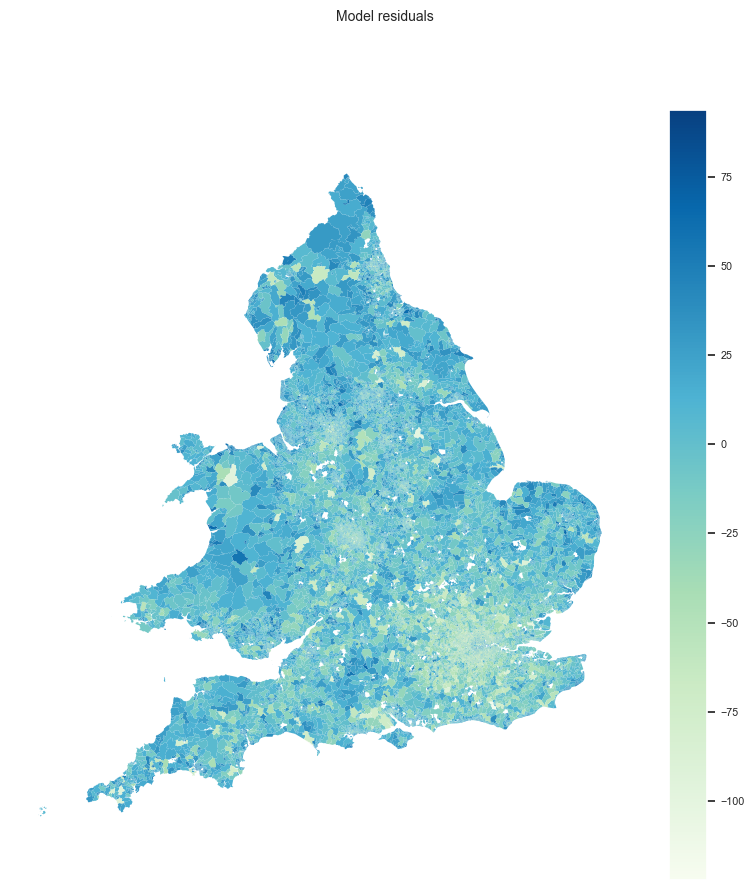

In [85]:
ax = LENG.plot(column='residuals', cmap='GnBu', legend=True, figsize=(10, 10), edgecolor='none',linewidth=0 )
ax.figure.suptitle('Model residuals')
ax.axis('off');

In [99]:
from libpysal.weights import Queen  # or Rook/KNN depending on your spatial structure
from libpysal.weights import KNN
from esda.moran import Moran
from esda.moran import Moran_Local

In [ ]:
LENG['geometry'] = LENG.geometry.buffer(0)
LENG = LENG[~LENG['geometry'].is_empty & LENG['geometry'].notna()]
LENG = LENG[~LENG['residuals'].isna()]

In [92]:
LENG.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [97]:
# Create spatial weights (every polygon has 4 neighbors)
w = KNN.from_dataframe(LENG, k=4)
w.transform = 'R'

# Run Moran's I
moran = Moran(LENG['residuals'], w)
print(f"Moran's I: {moran.I:.4f}, p-value: {moran.p_sim:.4f}")

/opt/anaconda3/envs/pysal/lib/python3.13/site-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Moran's I: 0.5671, p-value: 0.0010


(np.float64(57217.15077000031),
 np.float64(684141.35263),
 np.float64(-25470.00869500003),
 np.float64(690060.378195))

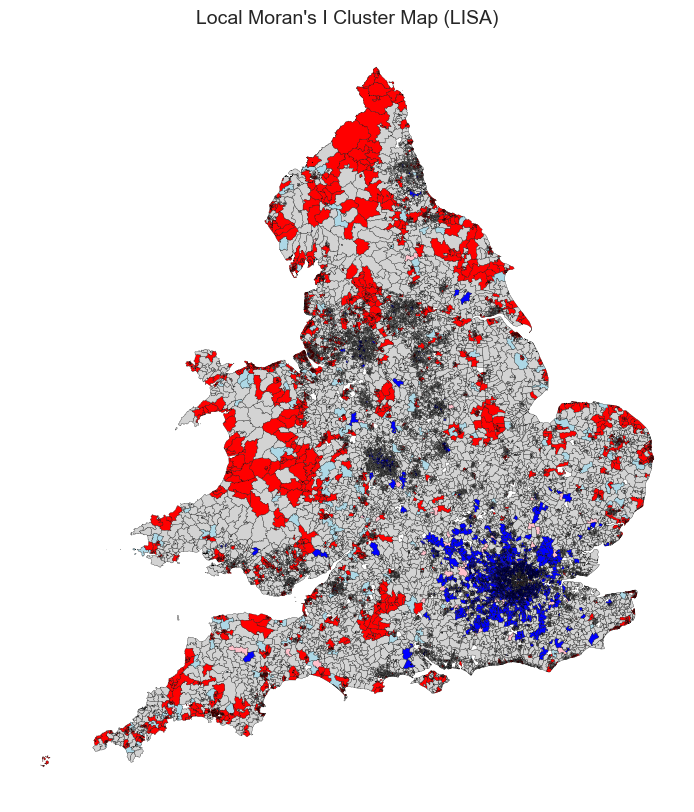

In [101]:

# Calculate Local Moran's I
moran_local = Moran_Local(LENG['residuals'], w)

# Add cluster labels
LENG['cluster'] = moran_local.q
LENG['significant'] = moran_local.p_sim < 0.05  # or another threshold

# Define cluster labels and colors
cluster_labels = {
    1: 'High-High',
    2: 'Low-High',
    3: 'Low-Low',
    4: 'High-Low'
}
cluster_colors = {
    1: 'red',
    2: 'lightblue',
    3: 'blue',
    4: 'pink'
}

# Create a color column based on significance and cluster type
LENG['color'] = 'lightgrey'  # default
for cluster, color in cluster_colors.items():
    LENG.loc[(LENG['cluster'] == cluster) & LENG['significant'], 'color'] = color

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
LENG.plot(color=LENG['color'], ax=ax, edgecolor='black', linewidth=0.2)
ax.set_title("Local Moran's I Cluster Map (LISA)", fontsize=14)
ax.axis('off')

(np.float64(57217.15077000031),
 np.float64(684141.35263),
 np.float64(-25470.00869500003),
 np.float64(690060.378195))

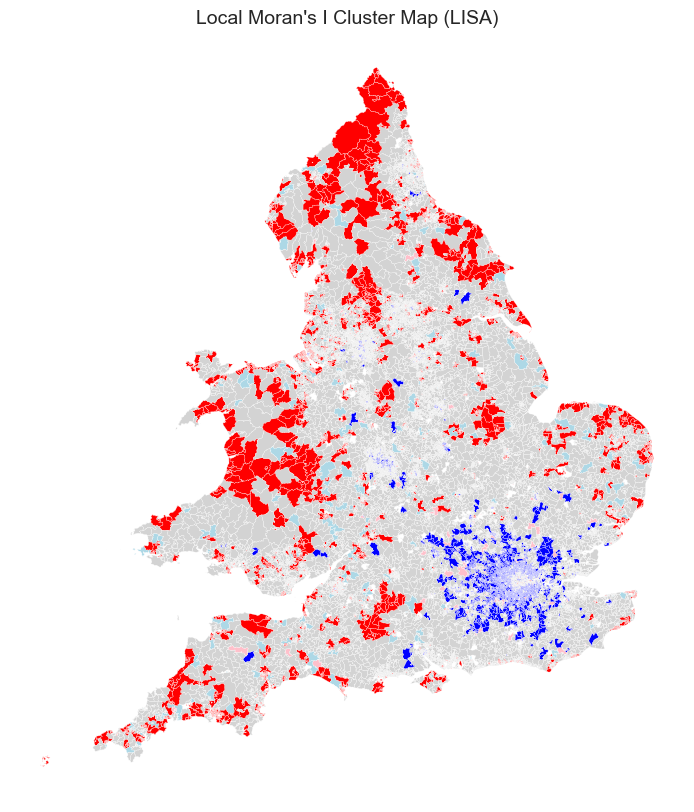

In [102]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
LENG.plot(color=LENG['color'], ax=ax, edgecolor=None, linewidth=0.2)
ax.set_title("Local Moran's I Cluster Map (LISA)", fontsize=14)
ax.axis('off')

In [ ]:
vars_rak_scot = corr_matrix_scot.loc[:,['D_GAP_rank']].reset_index()

In [71]:
LENG['residuals'].describe()

count    34652.000000
mean         0.017605
std         24.158268
min       -122.151120
25%        -16.058724
50%          1.305311
75%         16.984324
max         93.706287
Name: residuals, dtype: float64

In [104]:

from spreg import ML_Lag

In [ ]:
LENG['D_G']

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 34652 entries, 0 to 35689
Columns: 207 entries, label to color
dtypes: bool(1), float64(161), geometry(1), int64(19), object(25)
memory usage: 54.8+ MB


In [110]:
# Step 2: Define variables
y = LENG[['D_GAP_rank_y']].values  # 2D array
X = LENG[['COUNTRY_y','C_RurUrb_bin_y', 'E_FloorArea_mean_y', 'E_EFFICIENCY_mean_y']].values  # 2D array

# Step 3: Fit spatial lag model
lag_model = ML_Lag(y, X, w=w, name_y='D_GAP_rank', name_x=[' COUNTRY','C_RurUrb_bin', 'E_FloorArea_mean', 'E_EFFICIENCY_mean'])

# Step 4: Print summary
print(lag_model.summary)

TypeError: can only concatenate str (not "float") to str